In [27]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [28]:
df_ori = pd.read_csv('diabetic_data.csv')
df = df_ori.copy(deep=True)
#for x in df.columns:
#    print(x, df[x].unique())

In [29]:
#df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# print(df.shape)
# print(df.dtypes)
# class_counts = df.groupby('readmitted').size() 
# print(class_counts)

In [ ]:
# # pd.set_option('display.width', 100)
# # pd.set_option('precision', 3)
# # correlations = df.corr(method='pearson')
# # print(correlations) 
# dfcopy = df_ori.copy(deep=True)
numerics = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id',
           'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
           'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
            'number_diagnoses']

others = [col for col in df.columns if col not in numerics]

scaler = MinMaxScaler()
x_num = scaler.fit_transform(df[numerics])
x_all = np.concatenate([x_num, df[others].values], axis =1)

df_copy = pd.DataFrame(data=x_all, columns=numerics+others)

#print(df_copy['race'])
# print("SKEWS")
# skew = df.skew()
# #print(df.head())
# print(skew) 
# print(df['number_diagnoses'])

# #using minmax scaler does not take away skew

# from sklearn.preprocessing import minmax_scale

# for x in numerics:
#     dfcopy[x] = minmax_scale(dfcopy[x])
# print("SKEWS -- minmax")    
# skew = dfcopy.skew()
# print(skew) 
# print(dfcopy['number_diagnoses'])
# # print(df['number_diagnoses'])
# # from sklearn.preprocessing import Normalizer
# # X = dfcopy[numerics].values
# # for x in numerics:
# #     scaler = Normalizer().fit()
# #     normalizedX = scaler.transform([dfcopy[x]])
# # #     #print(normalizedX
# # #     print(dfcopy[x].size, normalizedX.size)
# # #     print(dfcopy[x])
# # #     dfcopy[x] = normalizedX

# # def standardize(raw_data):
# #     return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))
# # dfcopy[numerics] = standardize(dfcopy[numerics])

# # print("SKEWS---Normalized")
# # print(dfcopy['number_diagnoses'])
# # skew = dfcopy.skew()
# # #print(df.head())
# # print(skew) 

In [ ]:
# df.hist()
# plt.show()

In [ ]:
# df.plot(kind='density', subplots=True, layout=(6,6), sharex=False) 
# plt.show() 

In [ ]:
# df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False) 
# plt.show() 

In [ ]:
# correlations = df.corr()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# plt.show() 

# from pandas.plotting import scatter_matrix
# scatter_matrix(df)
# plt.show() 

In [30]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
df['readmitted'] = df['readmitted'].replace('NO', 0)
df.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [31]:
df.drop(columns = ['patient_nbr','citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)
#df.drop(columns = ['citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)

#df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
drop_Idx = set()
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3']=='?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,0


In [32]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)

df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

df = df.replace('?', -1)
#df.head()

for col in df:
    print(col, " : ")
    print(df[col].unique())
    

race  : 
[ 0  1 -1  4  3  2]
gender  : 
[0 1]
age  : 
[15 25 35 45 55 65 75 85 95  5]
admission_type_id  : 
[1 2 3 6 4 5 8 7]
discharge_disposition_id  : 
[ 1  3  6  2  5  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28 19
 27]
admission_source_id  : 
[ 7  2  4  1  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital  : 
[ 3  2  1  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures  : 
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  66  36  19  64  25  53  52  87  27  37  41  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures  : 
[0 5 1 6 2 3 4]
num_medications  : 
[18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25  4 

In [33]:
# df.loc[(df.diag_1.str.contains('V')),'diag_1']=0
# df.loc[(df.diag_1.str.contains('E')),'diag_1']=0

# df.loc[(df.diag_2.str.contains('V')),'diag_2']=0
# df.loc[(df.diag_2.str.contains('E')),'diag_2']=0

# df.loc[(df.diag_3.str.contains('V')),'diag_3']=0
# df.loc[(df.diag_3.str.contains('E')),'diag_3']=0

# for i in df['diag_1']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_2']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_3']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))

diags = ['diag_1','diag_2','diag_3']
    
def detection(value):
    if value[0]== "V" or value[0] == 'E':
        value = '0'
        return value # from new york united healthcare
    else:
        return value
    
for f in diags:
    for i in df[f].index:
        df[f].at[i] = detection(df[f].at[i])
        
for i in df['diag_1']:
    b = 'V' in str(i)
    c = 'E' in str(i)
    if b or c:
        print(str(i))

    

In [34]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
#print("geelo ", df.columns)
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)
df.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol            

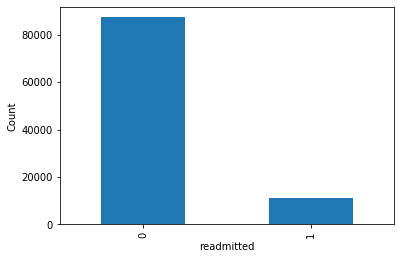

(98601, 95)


In [35]:
#df_age = pd.get_dummies(df['age'])
#df_race = pd.get_dummies(df['race'])
#df_gender = pd.get_dummies(df['gender'])
#df_change = pd.get_dummies(df['change'])
#df_diabetesMed = pd.get_dummies(df['diabetesMed'])

df_max_glu_serum = pd.get_dummies(df['max_glu_serum'])
df_A1Cresult = pd.get_dummies(df['A1Cresult'])
df_insulin = pd.get_dummies(df['insulin'])
df_discharge_disposition_id = pd.get_dummies(df['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(df['admission_source_id'])
df_admission_type_id = pd.get_dummies(df['admission_type_id'])

#print(df_max_glu_serum)
#df = pd.concat([df,df_max_glu_serum])
#df.drop(['max_glu_serum'], axis=1, inplace=True)             
df = pd.concat([df,df_max_glu_serum, df_A1Cresult, 
                df_insulin, df_discharge_disposition_id, 
                df_admission_source_id, df_admission_type_id], axis=1)
df.drop([ 'max_glu_serum', 'A1Cresult', 'insulin','discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)
#before
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

print(df.shape)
# df = df['readmitted' == 1 or 'readmitted' == 0]
#df.readmitted = np.where(df.readmitted=2, 0, df.readmitted)
#after
# df.groupby('readmitted').size().plot(kind='bar')
# plt.ylabel('Count')
# plt.title("AFTER CHANGE")
# plt.show()
# #print(df.iloc[0])
# #df.head()
# df.head()

In [41]:
from sklearn.model_selection import train_test_split

feature_col_names = df.columns
#print(df.columns)
#x = df[feature_col_names]
#x = x.drop('readmitted', axis=1)
x = df.loc[:, df.columns != 'readmitted']
y = df['readmitted']
#print(x.columns, y)
#print(y.unique())
#print(x, y)
#print(x.iloc[0])
#print(y.iloc[0])
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

race                   0
gender                 0
age                   15
time_in_hospital       3
num_lab_procedures    59
                      ..
4                      0
5                      0
6                      0
7                      0
8                      0
Name: 1, Length: 94, dtype: object
0


In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x.values, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train_SMOTE, X_test_SMOTE, Y_train_SMOTE, Y_test_SMOTE = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

# print(X_dev)
# print(Y_dev)

Original dataset shape Counter({0: 87351, 1: 11250})
New dataset shape Counter({0: 87351, 1: 87351})


In [ ]:
#print(x.iloc[[2, 3, 4]].values)
#print(x.values[[2, 3, 4]])


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(x, y):
    print("Going....")
    model = Sequential()
    model.add(Dense(12, input_dim=94, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
    model.fit(x.values[train], y.values[train], epochs=150, batch_size=10, verbose=0)
# evaluate the model
    scores = model.evaluate(x.values[test], y.values[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

hello
(88740,) (9861,)
(88740, 94)
(88740,)


KeyError: '[32773, 98316, 98319, 32784, 98322, 32788, 21, 32798, 32802, 35, 32804, 98352, 65586, 32821, 98357, 65593, 58, 65599, 65, 32837, 32838, 32839, 98381, 32850, 85, 86, 98392, 93, 32862, 98406, 65641, 98410, 32875, 65643, 109, 98413, 65649, 114, 117, 32885, 65654, 98422, 32893, 32896, 130, 131, 32898, 136, 32904, 65673, 139, 98446, 143, 65679, 32917, 98455, 153, 154, 32922, 98457, 98458, 165, 65703, 168, 98473, 175, 98479, 180, 65716, 98484, 65719, 98486, 32957, 65726, 98494, 98495, 65732, 65734, 204, 32972, 208, 65745, 98515, 212, 65748, 32983, 65752, 65753, 226, 65762, 32996, 65763, 98534, 98540, 33005, 33006, 240, 65780, 246, 98552, 98555, 98560, 65793, 33026, 259, 33028, 65800, 268, 65810, 98580, 33049, 33051, 98587, 288, 65824, 33060, 65848, 317, 65857, 325, 33094, 33096, 65881, 33117, 65885, 33119, 65895, 361, 65899, 65900, 33135, 33139, 65908, 33141, 65909, 376, 388, 33161, 65929, 65930, 65933, 65939, 33172, 65941, 65942, 33184, 65952, 418, 420, 33197, 33199, 33201, 33202, 435, 33206, 33207, 65990, 33223, 33229, 66000, 66015, 485, 486, 488, 33257, 498, 507, 508, 66044, 66052, 33286, 66058, 33295, 33296, 530, 33300, 33302, 536, 66072, 33315, 33323, 33324, 561, 33329, 66106, 33339, 578, 66114, 33348, 66122, 33357, 597, 602, 33378, 66147, 66149, 33382, 615, 33385, 621, 66159, 33392, 33393, 66161, 629, 66170, 66174, 33407, 33410, 66183, 655, 656, 33427, 660, 661, 33432, 666, 33438, 66206, 66208, 33443, 66213, 33451, 66221, 686, 33458, 66228, 33462, 66232, 66234, 699, 704, 33475, 709, 33479, 713, 33482, 66260, 33493, 66268, 66273, 66276, 33511, 33512, 33515, 33517, 755, 33524, 66298, 66307, 66308, 66309, 774, 33548, 33552, 786, 66330, 33567, 800, 802, 33571, 33581, 33590, 66358, 824, 33593, 826, 33597, 66367, 833, 33601, 836, 66377, 66378, 66379, 846, 849, 852, 66393, 33627, 860, 33629, 66396, 66404, 872, 66411, 882, 886, 66424, 33657, 66432, 897, 898, 904, 33673, 925, 66462, 33698, 33699, 66468, 33705, 66484, 949, 33720, 33723, 66493, 33728, 33730, 33733, 66503, 979, 980, 66519, 33753, 66524, 989, 990, 66529, 994, 998, 999, 1008, 1011, 1012, 1013, 33783, 33787, 1020, 66556, 33794, 66567, 66568, 1035, 33803, 66575, 66576, 1042, 33810, 1045, 66584, 1051, 66591, 1057, 33833, 33836, 33840, 1075, 33844, 1078, 1080, 33852, 1089, 1090, 33864, 1112, 1119, 33893, 66663, 66665, 33900, 66672, 66673, 33913, 33918, 66693, 1159, 33929, 66698, 66701, 66706, 33950, 1186, 1191, 1193, 33963, 33966, 33968, 66736, 1204, 66741, 1208, 1209, 1213, 66753, 33987, 66756, 1222, 33991, 66770, 1235, 1237, 34006, 34008, 1244, 34013, 34015, 34017, 1252, 1257, 66805, 34039, 1273, 34044, 66816, 1282, 34055, 1292, 34064, 1300, 1301, 34070, 1305, 66844, 1315, 66855, 1321, 34091, 1326, 1338, 34113, 34114, 66882, 1353, 66889, 1364, 34132, 1366, 1367, 1369, 66917, 1383, 1387, 66931, 1400, 34168, 66949, 34187, 66962, 34206, 34210, 1444, 34217, 34220, 66993, 1460, 67006, 34240, 67011, 1484, 1486, 1487, 67022, 34257, 1515, 34288, 34294, 1527, 1530, 1534, 1535, 1540, 1541, 67078, 67079, 34312, 34320, 1553, 1554, 67090, 67094, 34334, 67103, 67113, 67119, 67122, 1592, 67131, 67133, 67139, 67140, 34374, 34379, 34380, 34383, 34384, 67151, 1621, 1622, 67158, 67161, 1626, 67165, 1631, 67167, 34401, 67168, 1635, 1638, 1639, 67175, 34409, 34415, 34416, 1649, 34418, 67184, 67191, 1656, 34427, 67201, 34434, 1671, 1675, 34444, 1679, 34448, 34451, 1686, 1690, 1692, 1693, 67232, 67235, 67237, 34470, 34472, 67240, 34476, 1710, 1715, 34486, 1721, 67257, 1727, 1728, 34497, 34498, 34499, 34500, 67265, 1734, 67266, 67268, 1741, 1742, 34515, 1752, 67290, 67293, 34526, 34528, 67297, 67299, 34532, 1769, 34545, 1779, 1780, 1781, 67318, 1784, 34555, 34569, 34571, 1806, 34578, 67346, 1813, 1817, 67354, 34588, 1824, 34592, 34594, 67365, 34601, 1836, 1838, 34606, 1844, 1847, 34615, 67389, 34623, 67395, 1860, 34636, 1869, 1872, 67411, 1877, 34645, 34648, 67419, 1890, 67434, 34667, 34669, 34671, 67443, 67450, 34686, 1924, 67461, 67464, 1930, 67470, 34703, 67473, 1939, 1940, 1951, 34720, 1961, 34735, 1971, 34741, 34742, 1976, 34751, 34756, 34758, 67532, 1999, 67542, 2008, 2014, 67552, 2021, 2023, 67561, 2026, 34794, 67566, 67569, 67570, 34803, 34807, 67577, 67579, 67587, 2052, 2053, 67593, 67594, 2059, 34837, 67606, 2078, 34863, 2100, 67645, 67651, 67653, 2121, 34890, 34894, 34895, 67663, 67671, 67678, 67686, 2151, 2154, 2156, 67693, 34929, 2163, 34936, 2172, 67709, 2175, 34946, 2181, 34957, 34960, 34961, 34966, 2199, 67737, 34976, 67744, 67745, 67747, 34986, 34989, 2223, 34992, 34995, 34996, 2229, 67763, 67765, 35010, 35013, 2247, 2253, 67794, 67799, 2267, 35040, 35041, 67809, 35048, 35049, 35053, 2292, 35064, 67836, 2304, 35080, 67850, 2318, 67856, 35089, 35092, 2325, 35093, 67872, 2337, 2341, 35112, 67885, 67887, 2352, 2353, 35120, 67897, 35137, 2372, 67908, 35145, 35147, 35148, 67918, 67922, 2391, 35164, 2398, 35167, 35171, 35183, 2416, 2417, 67955, 35199, 35200, 67967, 2435, 35203, 35205, 67972, 2439, 67975, 35209, 67976, 35211, 67977, 35216, 67985, 35221, 35224, 35226, 2459, 35227, 35230, 68003, 2469, 35240, 2480, 68016, 2482, 68027, 68032, 68038, 68040, 68043, 2509, 2512, 2517, 35288, 68059, 2524, 35293, 2526, 68061, 68062, 2534, 35306, 2542, 2543, 68085, 35319, 35322, 68091, 35327, 2564, 68100, 2570, 68107, 2572, 35353, 68129, 35366, 2600, 35369, 68137, 35371, 35372, 35376, 68148, 35389, 35392, 2625, 2627, 68166, 68167, 35405, 35412, 2650, 68190, 35425, 2660, 68198, 2667, 2671, 68213, 2680, 35459, 68229, 68239, 35481, 2722, 68258, 2725, 2726, 2727, 35494, 35499, 2732, 68269, 68271, 68275, 68276, 2747, 2751, 68289, 68295, 35530, 35531, 35535, 68303, 68304, 35543, 35545, 68315, 2784, 35556, 68325, 2793, 68331, 68332, 35571, 68340, 68344, 35578, 68350, 2815, 2816, 35587, 35588, 68362, 35597, 2832, 68370, 68375, 68376, 35612, 35614, 35615, 68387, 68391, 35632, 2865, 2868, 2869, 35638, 35639, 35640, 35641, 35645, 68422, 2892, 68428, 35662, 2900, 35670, 35672, 2907, 2908, 2912, 35687, 2927, 68464, 2931, 68471, 35708, 35712, 2950, 68487, 2952, 35726, 35728, 35739, 68513, 2978, 35746, 2982, 2984, 68520, 68525, 2995, 35764, 68531, 3004, 35772, 68541, 68543, 3011, 35780, 3029, 35799, 35809, 3042, 3045, 3046, 35813, 35816, 35817, 3053, 35822, 35823, 68591, 3066, 3067, 35838, 68615, 68625, 35865, 68635, 35874, 68643, 68652, 3120, 35890, 3131, 3135, 35903, 3141, 68696, 3166, 35938, 68713, 68715, 3181, 3182, 68717, 3187, 68728, 68729, 3197, 68733, 35969, 35977, 68745, 35985, 35988, 68757, 3226, 3230, 36002, 3238, 36007, 68776, 3243, 3244, 36014, 68782, 68784, 36021, 36022, 3255, 68793, 3262, 3266, 68805, 36044, 68812, 36046, 36047, 68823, 68825, 68826, 36062, 68830, 36065, 3299, 3303, 36072, 3305, 36073, 68842, 36079, 3317, 36093, 3326, 68875, 68878, 36112, 3348, 36119, 68889, 3359, 3362, 68898, 36132, 36133, 68899, 36137, 36138, 68905, 36140, 36151, 3388, 36158, 36160, 36161, 68929, 36164, 3398, 36166, 36170, 36174, 68946, 68948, 68949, 68959, 36192, 68960, 68961, 3428, 3429, 36201, 3434, 3441, 3443, 68983, 68988, 36225, 3459, 36233, 36240, 69008, 69009, 3479, 69017, 3483, 69020, 36257, 36258, 69026, 36260, 36261, 36262, 3495, 36264, 3497, 36267, 3504, 36272, 36282, 69056, 69057, 69064, 36297, 36302, 36304, 69075, 36311, 36317, 69086, 69088, 69090, 69091, 3559, 36329, 69107, 3575, 69115, 69120, 69136, 3601, 3605, 36373, 3609, 36378, 69145, 36384, 69153, 3622, 69166, 36401, 3644, 3646, 36419, 3661, 36433, 36434, 3671, 3675, 36443, 3677, 3690, 36462, 69232, 3698, 36468, 69240, 36476, 36478, 36482, 69251, 69252, 36486, 36487, 36489, 3722, 3723, 36490, 3725, 69260, 3733, 3736, 36504, 3738, 36505, 69273, 3747, 3749, 69285, 36519, 3752, 69286, 3755, 36523, 36524, 69294, 69295, 36530, 69302, 69308, 36543, 3776, 36546, 3780, 36550, 36559, 36561, 36568, 36571, 69339, 36573, 3806, 36575, 3808, 69348, 3813, 69352, 36591, 3827, 69364, 3829, 36598, 36599, 36601, 3834, 3840, 3841, 36611, 69384, 3849, 36620, 36628, 36632, 3871, 36640, 36643, 69418, 36653, 3886, 69423, 69426, 3892, 69433, 69435, 3901, 3905, 3906, 36674, 3908, 3916, 36694, 69465, 69469, 69473, 3940, 3943, 69481, 3949, 36717, 36719, 3955, 36734, 69502, 69505, 36741, 36742, 3976, 69523, 36757, 36759, 69528, 3994, 36764, 3997, 4001, 4004, 69544, 36778, 69547, 4012, 4015, 69552, 36788, 69557, 4022, 36798, 4036, 36805, 69577, 69579, 69588, 69594, 4067, 36835, 69605, 4073, 4074, 4075, 36843, 4086, 36856, 4089, 69626, 36861, 4095, 36880, 4113, 69651, 4118, 4119, 69654, 4128, 69665, 4133, 36909, 4144, 69681, 4156, 4159, 36927, 4161, 36930, 36932, 4167, 4168, 4172, 36942, 69710, 4179, 4181, 69718, 4186, 36957, 36958, 4191, 36959, 69728, 36966, 4208, 36983, 69753, 4218, 36986, 69755, 36989, 69756, 36991, 69763, 69767, 69772, 37010, 69779, 69786, 4253, 37023, 69793, 69796, 37033, 37036, 37037, 4270, 37038, 69813, 4279, 69818, 69825, 37060, 4299, 4300, 69838, 4305, 4308, 69847, 37089, 4322, 37090, 69866, 37100, 69872, 69875, 37109, 37115, 37121, 37129, 69899, 4364, 69904, 4387, 69932, 69933, 69934, 37170, 37177, 69947, 4416, 37184, 69955, 4426, 37195, 69967, 37204, 69975, 4443, 4444, 37219, 69988, 37229, 69998, 37233, 70002, 37241, 70016, 4486, 4487, 70022, 70032, 70033, 70039, 4504, 70040, 37274, 37277, 37278, 4511, 70049, 37285, 37288, 4526, 37310, 4546, 37331, 70102, 70109, 37342, 70110, 70115, 4589, 70125, 4591, 4592, 70131, 4600, 37377, 70147, 70148, 4613, 4614, 4615, 4617, 37386, 4627, 4629, 4630, 37402, 37412, 70183, 4648, 4651, 37419, 37420, 70195, 4663, 37437, 4685, 4686, 70222, 37459, 70230, 70233, 70234, 37472, 4705, 4719, 37488, 37490, 70258, 4725, 37493, 70261, 37497, 4732, 4735, 4736, 70272, 4740, 4741, 4748, 70286, 70287, 37522, 37525, 70302, 37537, 4772, 70311, 70313, 37547, 4780, 4781, 70317, 37554, 70322, 4790, 37559, 70333, 4798, 4799, 37566, 4801, 37572, 37573, 70343, 70344, 37579, 70350, 4815, 70361, 37598, 4832, 37600, 4835, 4836, 70374, 70376, 70377, 70379, 70380, 70381, 70383, 4849, 37618, 37625, 37629, 70400, 37633, 4869, 4872, 37641, 37643, 4878, 37646, 70415, 4886, 37657, 70425, 4894, 70434, 70438, 70440, 70442, 70443, 4916, 37693, 70463, 4929, 4930, 37701, 4935, 37711, 70490, 70493, 4960, 4961, 37728, 37740, 70511, 37744, 37749, 4981, 70521, 37755, 70523, 4990, 37759, 4993, 5004, 37773, 5011, 5021, 5022, 70559, 5030, 5040, 70577, 5043, 70588, 70599, 70604, 5071, 37841, 70616, 70619, 5084, 70620, 5086, 37854, 5095, 37863, 37872, 5115, 70651, 5122, 70660, 5129, 70667, 37900, 5135, 70675, 37908, 5141, 37910, 70682, 70683, 5152, 37926, 5159, 5168, 5173, 37942, 70709, 37946, 70716, 5189, 70728, 5194, 70730, 5197, 70735, 37968, 70737, 5211, 37979, 5213, 5217, 70753, 37988, 37991, 37992, 70759, 5226, 70761, 70766, 5232, 38009, 70777, 5247, 5255, 38023, 38024, 38030, 5267, 38035, 70805, 70808, 5273, 38044, 38050, 38053, 38057, 70826, 38067, 70836, 38074, 70842, 5308, 5309, 70851, 38085, 5326, 70869, 38102, 38104, 5337, 5342, 5343, 5344, 5345, 38111, 5347, 38113, 5349, 70878, 38119, 70882, 70887, 70888, 38123, 70889, 38125, 70891, 5360, 70896, 70898, 70900, 38134, 5369, 38141, 70911, 5376, 38158, 70928, 38163, 5399, 5400, 38170, 70939, 38172, 5405, 70943, 38183, 5417, 70954, 38187, 38188, 38191, 38200, 5435, 5436, 38210, 5449, 38221, 38225, 38227, 70997, 38243, 38244, 5477, 5478, 38247, 71012, 38251, 71020, 5488, 38257, 38259, 5492, 38260, 38262, 5495, 71027, 38265, 71034, 5504, 38279, 5513, 38281, 38286, 71056, 38292, 71066, 5531, 38305, 71073, 71078, 5547, 71088, 5554, 5566, 38336, 71108, 5573, 38347, 71117, 71120, 71122, 71126, 38361, 38369, 5604, 38386, 71158, 71162, 38398, 5636, 5638, 38406, 38407, 38408, 38410, 71174, 71184, 5650, 38421, 71192, 38434, 5667, 5672, 38440, 38446, 5685, 38453, 38454, 38455, 71224, 38458, 71225, 5693, 71230, 71231, 71245, 71248, 38481, 38486, 71254, 38488, 38490, 38491, 71266, 5733, 38512, 5746, 5751, 38522, 5764, 71304, 71307, 38540, 5773, 71313, 38561, 71329, 38563, 38564, 71332, 38566, 71333, 38568, 71338, 38576, 71346, 5817, 5822, 71362, 5827, 71370, 38605, 71373, 38612, 5846, 5848, 71384, 5850, 71385, 5854, 5855, 71395, 38630, 71412, 71417, 71420, 71422, 5889, 5891, 5893, 5895, 71431, 71438, 38672, 71442, 38675, 71445, 5916, 5929, 5935, 5939, 5940, 71476, 71478, 38713, 38717, 71490, 71501, 5967, 71504, 38742, 38745, 5987, 5989, 38757, 5992, 38764, 38766, 38771, 71543, 6013, 38783, 71551, 38785, 71554, 38787, 6020, 6021, 6023, 71572, 6038, 38806, 6042, 71579, 71585, 6052, 6053, 38822, 71592, 6067, 71607, 38850, 71619, 38854, 71625, 38858, 6093, 71632, 6098, 6099, 71634, 6101, 38873, 38877, 38878, 71648, 71662, 71663, 71664, 71677, 38913, 38914, 38916, 38922, 6156, 71697, 6176, 38950, 38954, 38955, 71724, 38958, 71731, 6198, 6201, 6205, 6212, 38984, 71752, 71758, 71759, 6232, 6239, 71777, 6243, 71779, 6245, 39019, 6252, 39021, 71793, 6273, 39043, 39045, 6282, 6284, 39052, 39055, 6288, 39056, 71824, 6291, 39060, 39061, 6294, 71828, 6298, 71834, 39078, 6312, 71854, 6319, 39088, 39091, 6326, 6329, 71865, 71867, 71870, 39104, 39106, 39114, 39116, 39117, 71891, 39124, 6359, 39131, 39133, 71910, 39148, 6387, 39155, 39157, 6392, 39161, 39165, 39167, 71937, 39176, 39177, 71945, 6413, 6414, 6415, 39182, 6422, 39190, 71958, 6426, 39195, 6433, 39202, 39203, 6436, 71979, 6448, 39222, 6456, 39227, 39228, 72003, 6471, 72008, 72010, 39243, 39250, 72028, 39262, 6499, 6507, 39280, 39281, 6515, 39283, 6520, 6522, 6524, 39292, 6528, 39296, 39306, 72075, 6543, 6544, 39322, 39326, 39329, 72099, 6571, 6575, 6576, 6577, 72114, 6580, 39352, 6588, 39361, 6595, 6598, 39368, 39370, 39371, 72139, 6605, 72140, 72144, 39383, 72153, 72156, 39389, 72158, 39395, 6629, 72166, 72168, 6633, 39404, 6637, 39410, 6653, 6654, 39429, 6666, 6671, 39440, 72207, 6674, 39450, 72220, 6689, 39457, 6695, 6697, 6704, 6710, 6713, 6714, 6731, 39505, 6739, 72276, 72279, 39512, 72281, 39521, 39522, 39524, 39527, 39529, 72302, 39537, 72305, 72312, 6777, 6780, 72325, 6803, 6804, 72342, 72351, 6819, 39587, 72359, 6826, 39603, 39604, 6837, 72376, 6843, 72380, 72388, 72393, 72396, 6861, 72397, 72398, 6866, 72407, 39640, 39643, 72415, 72416, 39650, 39652, 39656, 39657, 6901, 39674, 39682, 39688, 6923, 39692, 72468, 39706, 6945, 39725, 72496, 6964, 39744, 72512, 72518, 39755, 72523, 7012, 39780, 7017, 7020, 39789, 39795, 39806, 72578, 72581, 72583, 7049, 7051, 72589, 39822, 39823, 7058, 72595, 7065, 72601, 39839, 72608, 72610, 7080, 39849, 39851, 72625, 7093, 72629, 7095, 7096, 72631, 7101, 7107, 39879, 7112, 39895, 72664, 7137, 72674, 7141, 7144, 39916, 7153, 39921, 39923, 39924, 72690, 72698, 72701, 7168, 7172, 72709, 72712, 72716, 72719, 7184, 39954, 72724, 7192, 7195, 72736, 39970, 39971, 7205, 7215, 7217, 7219, 72755, 7223, 7224, 39996, 40008, 72776, 7246, 7250, 7251, 7254, 72790, 72797, 7264, 40034, 40037, 7275, 72811, 40045, 72813, 7284, 72826, 40062, 7295, 40064, 72840, 72841, 40074, 7308, 72844, 72846, 40088, 72865, 72869, 7334, 40104, 72874, 40115, 40116, 72886, 40124, 40127, 72895, 72898, 72903, 72905, 72920, 40154, 72923, 40157, 72925, 40159, 7393, 40165, 72936, 72937, 7402, 72944, 72954, 72956, 40189, 40190, 40194, 72962, 72963, 72964, 72968, 40202, 40210, 7446, 72983, 40218, 40223, 40230, 72998, 73003, 73005, 7470, 40239, 73007, 40245, 40248, 7485, 7490, 73030, 40263, 40264, 7504, 73041, 40274, 7508, 7510, 40283, 40285, 7518, 73056, 73060, 40299, 73068, 73070, 40304, 7546, 7547, 7548, 40319, 7553, 73089, 40325, 40327, 40336, 73111, 73118, 7584, 40352, 40354, 40355, 7588, 73120, 40358, 73136, 7601, 73137, 73147, 7615, 73156, 7627, 40396, 7633, 40405, 73175, 7641, 40410, 73181, 73185, 40421, 7654, 7658, 40434, 40435, 73210, 73211, 73213, 7682, 73218, 40453, 7686, 7688, 7689, 7690, 73227, 73231, 40471, 73245, 73248, 40481, 73251, 40489, 40491, 73262, 73263, 73266, 7741, 40509, 73285, 7750, 7751, 7752, 40519, 7758, 73297, 73311, 40551, 40554, 73322, 73324, 40560, 73330, 40573, 40577, 7814, 73355, 40588, 73359, 40597, 73373, 73378, 7847, 73386, 40620, 40622, 40624, 73397, 7862, 40632, 40634, 73409, 7879, 73417, 7887, 73425, 73427, 40661, 40662, 73431, 7896, 73432, 40667, 40671, 40673, 40675, 40676, 73444, 7911, 73461, 40699, 7932, 73469, 40704, 40714, 40715, 7952, 40720, 73489, 40733, 73501, 73503, 73506, 40739, 40741, 40742, 40744, 7977, 40746, 7979, 40759, 8000, 40772, 8010, 8012, 40787, 8025, 40793, 73563, 40798, 40800, 73580, 8053, 73592, 40825, 8062, 40832, 73605, 8073, 73611, 8078, 40851, 8084, 73619, 40858, 8095, 73632, 73634, 40867, 8100, 73649, 8117, 40886, 40887, 40893, 73661, 73664, 8129, 8132, 40906, 40914, 40920, 40923, 40924, 40925, 73694, 73696, 40931, 8172, 8173, 40942, 73710, 40944, 73711, 8184, 40957, 40961, 8194, 40962, 8196, 8197, 8205, 40973, 40974, 40988, 40990, 73761, 73765, 8232, 8236, 41007, 8241, 41014, 73783, 41017, 73786, 41024, 73794, 8259, 41035, 41040, 73810, 8279, 8289, 73834, 8301, 73844, 8312, 73854, 8319, 41096, 8329, 73865, 73866, 73871, 41105, 8338, 41107, 8340, 41108, 41122, 8356, 73893, 73894, 41130, 41131, 8367, 8372, 8379, 73915, 41149, 41150, 73917, 73921, 73926, 8396, 73933, 8402, 73955, 8420, 73960, 73962, 8434, 73971, 73974, 8439, 8448, 73995, 8465, 74004, 74012, 41245, 8478, 74016, 8485, 8487, 8489, 8493, 74033, 8501, 41275, 41279, 8513, 74050, 8515, 74059, 41292, 41296, 8531, 8534, 74075, 8540, 8541, 74087, 8556, 41324, 74096, 8561, 41329, 8564, 41334, 41342, 41345, 74115, 41349, 8582, 8584, 74121, 74122, 74123, 41356, 74126, 41359, 41365, 74133, 74135, 74136, 8602, 74143, 74152, 74153, 41387, 41389, 8643, 8647, 8649, 8661, 74199, 41436, 74205, 74208, 74210, 41447, 74218, 8686, 8690, 74234, 74238, 74241, 74249, 8719, 41489, 8723, 8726, 8727, 74265, 41498, 8731, 41501, 8737, 8743, 41511, 8750, 8751, 41518, 74290, 41523, 41524, 8760, 8766, 74303, 8768, 74306, 74309, 8787, 74324, 41564, 41565, 74332, 74333, 74338, 41572, 8806, 41580, 41583, 8818, 8819, 41587, 74356, 74361, 41603, 74375, 41608, 8841, 74376, 74377, 74378, 74379, 74390, 41629, 74397, 41647, 41653, 41654, 74425, 41666, 41670, 74441, 41684, 41687, 74460, 8929, 41698, 41699, 74465, 8934, 41703, 74470, 74480, 8945, 74483, 41723, 74493, 74495, 8962, 74501, 74508, 8976, 41750, 74519, 8987, 41755, 41759, 41760, 74528, 8995, 74531, 74537, 74548, 74552, 9023, 9028, 9036, 74574, 41813, 9047, 9048, 41815, 74584, 74587, 9057, 41834, 74605, 9079, 9086, 41859, 41860, 74627, 41864, 74633, 9101, 9107, 74653, 74655, 41897, 41900, 9142, 74681, 41917, 41923, 74693, 41926, 9160, 9161, 9164, 74703, 9176, 41944, 41948, 9181, 9182, 41950, 41952, 74719, 9187, 9188, 41957, 9194, 9196, 9204, 41972, 9211, 74747, 9213, 74757, 74760, 9226, 9230, 9231, 9233, 9236, 9238, 42013, 74781, 74787, 42021, 74791, 42028, 42030, 74806, 42042, 42043, 74817, 9282, 42055, 42058, 9293, 74832, 9297, 9299, 9300, 42071, 9307, 42078, 42081, 74852, 74853, 42087, 42093, 74861, 9328, 9341, 42109, 42111, 74881, 9347, 9356, 9357, 42126, 42127, 9361, 9365, 74902, 42136, 42138, 42141, 42147, 9389, 9402, 9407, 9410, 9415, 74953, 42193, 42196, 42197, 9430, 9431, 42204, 42206, 74987, 42220, 42221, 74991, 74992, 42225, 42226, 9459, 9464, 9467, 9470, 75006, 9473, 75009, 75010, 75016, 75018, 9490, 9493, 75029, 9495, 75034, 9499, 9502, 75041, 42274, 42275, 42280, 9518, 9524, 42292, 42294, 75068, 9533, 42307, 75078, 75085, 42319, 42320, 75096, 75102, 42336, 42338, 75109, 42351, 42358, 42359, 42368, 75138, 75140, 9606, 9609, 75152, 75160, 9635, 75175, 9640, 75177, 42414, 9648, 9651, 9656, 9658, 42429, 75198, 42431, 42433, 42437, 9670, 42438, 42443, 75218, 9687, 9692, 42462, 9696, 75232, 9701, 9708, 42484, 42488, 42489, 42494, 9734, 9735, 42504, 75278, 9743, 42512, 9752, 42521, 42522, 9756, 42524, 42526, 42528, 42538, 42543, 9776, 42552, 75324, 9792, 42565, 75336, 42571, 9808, 75347, 75353, 9818, 75358, 9825, 9827, 9833, 75371, 75378, 9845, 9846, 75382, 42616, 9850, 42618, 42627, 9865, 9869, 9878, 75416, 9881, 9883, 42652, 42659, 9894, 9897, 75433, 75445, 42680, 75449, 9915, 9922, 42691, 42694, 42699, 75470, 9940, 75476, 75478, 42718, 42723, 42729, 75506, 9972, 75510, 42744, 9977, 42750, 75519, 42755, 9988, 75527, 9996, 9997, 10001, 75537, 42771, 75539, 75542, 42776, 10010, 42781, 10018, 42786, 42792, 10031, 42800, 75567, 10034, 42804, 10037, 10039, 42817, 75591, 10056, 75592, 42827, 75597, 75600, 75601, 42837, 75614, 10085, 10092, 10095, 42864, 10102, 75649, 75653, 42886, 75654, 10123, 10127, 10136, 10139, 42917, 75687, 42921, 75695, 75700, 10165, 75704, 75711, 75717, 42951, 75739, 75749, 10214, 75754, 42987, 42990, 42992, 42993, 42995, 10230, 75767, 43007, 10241, 10245, 75782, 43022, 10259, 43040, 75808, 10278, 10280, 43049, 43053, 43067, 10305, 75849, 10316, 75852, 10320, 75859, 75862, 43100, 10333, 75869, 10335, 10336, 75870, 75881, 10359, 43140, 75909, 75910, 10375, 75911, 43145, 75913, 43147, 75915, 10382, 43154, 75922, 10392, 43172, 10407, 43184, 10417, 75954, 10430, 75968, 43202, 43205, 43207, 75978, 75979, 43214, 10454, 10455, 75993, 10460, 76000, 76003, 43237, 10473, 76011, 43249, 76019, 76026, 10497, 76034, 10500, 76036, 10503, 10511, 76049, 10518, 10519, 43289, 76058, 10524, 76062, 10534, 43302, 43308, 10541, 43310, 43313, 10547, 43316, 76092, 10560, 76096, 43330, 43331, 76102, 43337, 43338, 10571, 10574, 76110, 43344, 76114, 10590, 76127, 10593, 10594, 76129, 43364, 43367, 43374, 76143, 10623, 10629, 10635, 43408, 43409, 76177, 10644, 10647, 76185, 76187, 76194, 76197, 43437, 76210, 43448, 76222, 43458, 10692, 43462, 76231, 76237, 10702, 76238, 76241, 76243, 43477, 10723, 76265, 43500, 43501, 10734, 43512, 43526, 10761, 76298, 10763, 43531, 43535, 43538, 43544, 43546, 10779, 76322, 76327, 43566, 10802, 10807, 43576, 10809, 43584, 10824, 10825, 10829, 76366, 76371, 43604, 43605, 76372, 76374, 43617, 43628, 76403, 76406, 10879, 10887, 76423, 10890, 43661, 76433, 76435, 43668, 76437, 76438, 76446, 43679, 76449, 43682, 43686, 10921, 76460, 76465, 76482, 76484, 76496, 43730, 76501, 10966, 10967, 76502, 10973, 10976, 76514, 43748, 76520, 43755, 43757, 43761, 76535, 11001, 11011, 43783, 43784, 76562, 43795, 76565, 43798, 76568, 43803, 76573, 43807, 43809, 76577, 76581, 11048, 43820, 76588, 43824, 76597, 76598, 11075, 76612, 43846, 11083, 43856, 11097, 43866, 76634, 43870, 11103, 11110, 11113, 11118, 11120, 43889, 11122, 11123, 76663, 76666, 11137, 43911, 11153, 76694, 11163, 76703, 43937, 76712, 43947, 43956, 43957, 11190, 76724, 43970, 11204, 76742, 11207, 43983, 76751, 11221, 43990, 11223, 11225, 43995, 11228, 11237, 11247, 76784, 76785, 76788, 44021, 76796, 76797, 44035, 76803, 76807, 11272, 11274, 44042, 11276, 76815, 11280, 44052, 76821, 11290, 11291, 76826, 76827, 76837, 11303, 76839, 44073, 44075, 11308, 76844, 11314, 44084, 44085, 76854, 76872, 76874, 11341, 44109, 76883, 11350, 76886, 11356, 76916, 76921, 11388, 11390, 44158, 76929, 11395, 44163, 44166, 44169, 11405, 11416, 44189, 44197, 76972, 76978, 76979, 11450, 44218, 44220, 76996, 11462, 44234, 11473, 11474, 11475, 77011, 44245, 11479, 77016, 77018, 44251, 44252, 77022, 77030, 11496, 77032, 11498, 44275, 11509, 44280, 77048, 77053, 11528, 44299, 44303, 77074, 44309, 44310, 44311, 11544, 11546, 11551, 11557, 11561, 44330, 77101, 44337, 44340, 77109, 77110, 44344, 44351, 77123, 44368, 77142, 44377, 11611, 11615, 11619, 44389, 77157, 44394, 44395, 77162, 77168, 11634, 77176, 77180, 77184, 11651, 77195, 11666, 77204, 77208, 77211, 11679, 77217, 77219, 77222, 77223, 44457, 44465, 77233, 44467, 11701, 11703, 77240, 44491, 11731, 77269, 44507, 11740, 77282, 44521, 44523, 11757, 44537, 44540, 44541, 77308, 77309, 11776, 44544, 44558, 44568, 77342, 77344, 77347, 11813, 44581, 11815, 44584, 11817, 77354, 77361, 77363, 11828, 11829, 44600, 11834, 44606, 11844, 77380, 44615, 77383, 11852, 77391, 44625, 77395, 77396, 77397, 44632, 77403, 77406, 44643, 77412, 11877, 77417, 44653, 11886, 77421, 44658, 11891, 77428, 11893, 77430, 11895, 11896, 44664, 44667, 77435, 44669, 77436, 44671, 11908, 44677, 44681, 11914, 77451, 77457, 11923, 44693, 77464, 77468, 11937, 77473, 11941, 77485, 11950, 77489, 77491, 11964, 44736, 11970, 11974, 11975, 77510, 44746, 11980, 11981, 11994, 44766, 12008, 44778, 12015, 77553, 12022, 77562, 12031, 12033, 12037, 77573, 44812, 12045, 12061, 12064, 44836, 12075, 44848, 77617, 12082, 12084, 12088, 44856, 12090, 44857, 77630, 44864, 77634, 77638, 44871, 77640, 77648, 44881, 12114, 77649, 12123, 77659, 12134, 44903, 77676, 44909, 77678, 12144, 77687, 44927, 44929, 12162, 44931, 77700, 44933, 77704, 44939, 44941, 44943, 44946, 77715, 12189, 44962, 12196, 77739, 44973, 12211, 77753, 77756, 77759, 12226, 12227, 77762, 12230, 77768, 12236, 12243, 45022, 12255, 77791, 45027, 77800, 77802, 45038, 12275, 77815, 45049, 45052, 12287, 77823, 45063, 77831, 45068, 45071, 45079, 77850, 12315, 77851, 12317, 45088, 12321, 45119, 77889, 45122, 45125, 45127, 12360, 12361, 12377, 12382, 12384, 45156, 77930, 12395, 12396, 45169, 12403, 77939, 45175, 12409, 45182, 45189, 12424, 45198, 45201, 45203, 77973, 12439, 77975, 45209, 77977, 77980, 12453, 45232, 78002, 78004, 45238, 78007, 45240, 45242, 12476, 78012, 12478, 12479, 78015, 45252, 78023, 78026, 12491, 45267, 12500, 78037, 12505, 78041, 78044, 45278, 78047, 12517, 45290, 12524, 12525, 78066, 45300, 12539, 45310, 12543, 78086, 45320, 78094, 45330, 78101, 78102, 78103, 45336, 45337, 12571, 45343, 12576, 45346, 78119, 78120, 12589, 78132, 78133, 45367, 45372, 78141, 45375, 78144, 45384, 45387, 45388, 78155, 45391, 45394, 45403, 45412, 78185, 12652, 12657, 12659, 45431, 45436, 45438, 12672, 78215, 12680, 78216, 45450, 78218, 78219, 12699, 12700, 12702, 12703, 45481, 78249, 78251, 12716, 78257, 45490, 12723, 12725, 78265, 78269, 78278, 78279, 12753, 45526, 12759, 12760, 45528, 12762, 78300, 78302, 12771, 12773, 45542, 12775, 78311, 12784, 12785, 45552, 45563, 45565, 45572, 45573, 12808, 12819, 45588, 12821, 45592, 12825, 45594, 78363, 12832, 78368, 12840, 45608, 78378, 45612, 12848, 12854, 78390, 12859, 12868, 45638, 78406, 12873, 45642, 45643, 78410, 78423, 78424, 12890, 12901, 12902, 78440, 12905, 78444, 12917, 45687, 78455, 45693, 45694, 45697, 12935, 12942, 45710, 45711, 78478, 78480, 78484, 45718, 45721, 12954, 12957, 12961, 12962, 78497, 78500, 45733, 12966, 78502, 45736, 45744, 12982, 12985, 45756, 78525, 45758, 45772, 78543, 78544, 45780, 78549, 13019, 78556, 13025, 13035, 78571, 78573, 78576, 45809, 45810, 45815, 45824, 78592, 45829, 13062, 13064, 13065, 13073, 13077, 45846, 78625, 13095, 13097, 45868, 78640, 13109, 13116, 78654, 78656, 13124, 45894, 13130, 78666, 45904, 78676, 78683, 13154, 78691, 45930, 45936, 13172, 78710, 13175, 13177, 45946, 13183, 45951, 78720, 45954, 78726, 45962, 13195, 45975, 45978, 45983, 13216, 45985, 78751, 78753, 13220, 78754, 78761, 13226, 13228, 78771, 13239, 13244, 46014, 13247, 13249, 46019, 13254, 78792, 46029, 13263, 78807, 46042, 78811, 13279, 78820, 13285, 78824, 46063, 46064, 13297, 78832, 46069, 78840, 78842, 78847, 78849, 13315, 78851, 46086, 13320, 46088, 78857, 13326, 78862, 78865, 46109, 46116, 46118, 78891, 13357, 78893, 46127, 78897, 46130, 78899, 13365, 13366, 78903, 46142, 46151, 78921, 78929, 13395, 46163, 78933, 78935, 13401, 78939, 13409, 13411, 78947, 78949, 78956, 46192, 46194, 46202, 46203, 78973, 46207, 13441, 46212, 13445, 13446, 78988, 13454, 78991, 13460, 78999, 13472, 46241, 79009, 46244, 79014, 79021, 46263, 79035, 79040, 13505, 79050, 79056, 13526, 13527, 46295, 79067, 46305, 79073, 46307, 79082, 46319, 46321, 79089, 79095, 46329, 13570, 13576, 79112, 13579, 79117, 13585, 46353, 13587, 79121, 46358, 79127, 13593, 46364, 46368, 46369, 13606, 46378, 46383, 13622, 13624, 46395, 79164, 46399, 13633, 46407, 79177, 46419, 13654, 13660, 79198, 13669, 13676, 79219, 79221, 46456, 46462, 79231, 46477, 79250, 79254, 13721, 46498, 46503, 13748, 79284, 46522, 46523, 79290, 46526, 46533, 79301, 79303, 79305, 13771, 46543, 79312, 46545, 13779, 79317, 46552, 79320, 79323, 79329, 13794, 79336, 79338, 46575, 79350, 13820, 79357, 13826, 13834, 13835, 79371, 79379, 46614, 79389, 79394, 79396, 13862, 13868, 13871, 79410, 13877, 13878, 79414, 79415, 79427, 13896, 13898, 46669, 79438, 79442, 13907, 79445, 13918, 46695, 13932, 13935, 46703, 13939, 46709, 13945, 79485, 46718, 13951, 13952, 13954, 13956, 46726, 46730, 79500, 13965, 13978, 46746, 13982, 13984, 13985, 46756, 46758, 46767, 14003, 14008, 14010, 14025, 46795, 79564, 46798, 14037, 46806, 14041, 46810, 79577, 14047, 79584, 46818, 46820, 79588, 46825, 79595, 14061, 79598, 14065, 79603, 46840, 79611, 46847, 79617, 14083, 46857, 79627, 14096, 14098, 46866, 46868, 14104, 46872, 79640, 14107, 46878, 46880, 79648, 79656, 14133, 14136, 14140, 46921, 46923, 79692, 14160, 46930, 14169, 79708, 46944, 14182, 79724, 46963, 79732, 79733, 46971, 79741, 14213, 14214, 46983, 14216, 79749, 46988, 46991, 14226, 14229, 79766, 79769, 14235, 79784, 14249, 79786, 14251, 14254, 47022, 47028, 47029, 47030, 79797, 79798, 79807, 14280, 79822, 14294, 14303, 79839, 79840, 14308, 14309, 79845, 79847, 47088, 14327, 47095, 14330, 79872, 79874, 79876, 79878, 14344, 79884, 47118, 79886, 79888, 14363, 79901, 47135, 14372, 79908, 79915, 14382, 79920, 79921, 79922, 14388, 79931, 79932, 14397, 79934, 47167, 14401, 14404, 14409, 14410, 47182, 14415, 47186, 79954, 47189, 47192, 79962, 14444, 47213, 79980, 79983, 47225, 79997, 79998, 80003, 47236, 80014, 47247, 14483, 80025, 47260, 14495, 14496, 80033, 47272, 47277, 47286, 47289, 14531, 80067, 80068, 14534, 47304, 80073, 14538, 14541, 80078, 80084, 80085, 80086, 80088, 14553, 80089, 47327, 80096, 14562, 80098, 14566, 14569, 14573, 47343, 47350, 14584, 47353, 14588, 47356, 47363, 80138, 47373, 14606, 80145, 47381, 14614, 80151, 80153, 14619, 80155, 14623, 47398, 14632, 47405, 80177, 47410, 14644, 80181, 80183, 47427, 14660, 80196, 14664, 47434, 47435, 14668, 14675, 47444, 14683, 80219, 14687, 80227, 80234, 47468, 14714, 14719, 47491, 80259, 47493, 47495, 80264, 47504, 14737, 47505, 80275, 47508, 47511, 14747, 14750, 14759, 47528, 80297, 14765, 47544, 47545, 80315, 47553, 47561, 47565, 14801, 80337, 47578, 80352, 80358, 14827, 47597, 14839, 14840, 47608, 47613, 14853, 14864, 14865, 80407, 14873, 14874, 47644, 47646, 80417, 14891, 47662, 80431, 80435, 47668, 80444, 14917, 80462, 14929, 47697, 47698, 47699, 80465, 47702, 47703, 80475, 80478, 14945, 47718, 80489, 80495, 47728, 14967, 80504, 47739, 14972, 14976, 80512, 47746, 80515, 14983, 80522, 14987, 80526, 80533, 47767, 47769, 47770, 47777, 47778, 47779, 15022, 47792, 80564, 47799, 80569, 80574, 80582, 80586, 15055, 15062, 15066, 15067, 47836, 80603, 15074, 47844, 47849, 80617, 15083, 47852, 80622, 47855, 15088, 80625, 15091, 15092, 80635, 15100, 80636, 15107, 80643, 15109, 80647, 47887, 15129, 15131, 15144, 80683, 47917, 47918, 15152, 15153, 80689, 47923, 15160, 80697, 80703, 15169, 80705, 15172, 47941, 47946, 80716, 80720, 15188, 80724, 80725, 47961, 80735, 15202, 15205, 80743, 15214, 47982, 80757, 47991, 80765, 48000, 80769, 15235, 15237, 80773, 80774, 80780, 15247, 80784, 15254, 15257, 15259, 15261, 48057, 80825, 48062, 15298, 15302, 80839, 48072, 15306, 80850, 80851, 48088, 48090, 48093, 80861, 80869, 80871, 15337, 15339, 48107, 48109, 80877, 15346, 15348, 15349, 48117, 80884, 15352, 80889, 48122, 80896, 80901, 48134, 15378, 48148, 15383, 48151, 80928, 48162, 80930, 80934, 15402, 48170, 48171, 48172, 80944, 48179, 48182, 80951, 15418, 80955, 80956, 48189, 15425, 15427, 80967, 80968, 80970, 80974, 80975, 80976, 15445, 80988, 15455, 80994, 48229, 15467, 15469, 48240, 15473, 48241, 15475, 48249, 15485, 48254, 48256, 15489, 15492, 81030, 81031, 48264, 81041, 81054, 15519, 48287, 81055, 48290, 15523, 48304, 48307, 48310, 15549, 48322, 81091, 48324, 48326, 81100, 81103, 81104, 48337, 81106, 48343, 81114, 81123, 15590, 15597, 15598, 15599, 48367, 81136, 48372, 15607, 15610, 81147, 15616, 15623, 15624, 48391, 15626, 81166, 81170, 81171, 81173, 15654, 15657, 15659, 48433, 15666, 48434, 15668, 15669, 48437, 81203, 15672, 81204, 48456, 48457, 48460, 81232, 48465, 15704, 81240, 81244, 15712, 48489, 15729, 15730, 81270, 48504, 15740, 15743, 15746, 81284, 81286, 81287, 81289, 48522, 81295, 15761, 15763, 81300, 15765, 81302, 81306, 15771, 48539, 15773, 81309, 15775, 15778, 48551, 81321, 48563, 81336, 15802, 48574, 15808, 15812, 81349, 15815, 48584, 15820, 15821, 48593, 81364, 48605, 81375, 15846, 48614, 81385, 81387, 81393, 81405, 15871, 15872, 81409, 48643, 81411, 15877, 81413, 48648, 15890, 48660, 48661, 48664, 15897, 48668, 48671, 15908, 48680, 15914, 48684, 48690, 15923, 48692, 81462, 48695, 48697, 48699, 15932, 81468, 48702, 48703, 48704, 81488, 48726, 48736, 15970, 81513, 48752, 48753, 81528, 48761, 48766, 16001, 48769, 16005, 48774, 81545, 16010, 81554, 48788, 48789, 48791, 48795, 16031, 48808, 16053, 48821, 16060, 81597, 16070, 48846, 81617, 48851, 81620, 16085, 16086, 16087, 16088, 81622, 16093, 16094, 81631, 48870, 81649, 48884, 16129, 16134, 81679, 16157, 48926, 81694, 48930, 16162, 81706, 48941, 48943, 16176, 48948, 81717, 16201, 81739, 81740, 16206, 16208, 16218, 48990, 81764, 16235, 81772, 49007, 81784, 16253, 81790, 49023, 49025, 81793, 81802, 49036, 49037, 49038, 81812, 16278, 81815, 49049, 81818, 16286, 81825, 49058, 16291, 16295, 49065, 49067, 49070, 16311, 81850, 81853, 49092, 16325, 81860, 16327, 49096, 49097, 49103, 16340, 16348, 49127, 16362, 49137, 81910, 16375, 49144, 81911, 16378, 81918, 16391, 81930, 49174, 81944, 81948, 49181, 49185, 81956, 81962, 81963, 49201, 49202, 81972, 49210, 81980, 81981, 49214, 81982, 82000, 49234, 49237, 82015, 82016, 49256, 82024, 82028, 49261, 49262, 16495, 49264, 82032, 82038, 16505, 16507, 49276, 16511, 49280, 49285, 16521, 82062, 16529, 49301, 16535, 16537, 82076, 82077, 16542, 49319, 16552, 82091, 49328, 16569, 82105, 49339, 16572, 49340, 82111, 16579, 49352, 82121, 16586, 49355, 16590, 49359, 16600, 82139, 82142, 49377, 16611, 49380, 49383, 16619, 16622, 49396, 16632, 16637, 49406, 82176, 49409, 82177, 16651, 16652, 49419, 16661, 82197, 16663, 16664, 16666, 82216, 82219, 16684, 82226, 16707, 82244, 82248, 49481, 16719, 82256, 49493, 16728, 16731, 82268, 16740, 49511, 82283, 16750, 49522, 49527, 49529, 82300, 49533, 49537, 16772, 16781, 82317, 82322, 16801, 16802, 49571, 49572, 82338, 82345, 16813, 16817, 49587, 49597, 82368, 49602, 49605, 16838, 16843, 16850, 49618, 16855, 49627, 16866, 49634, 16870, 82406, 49641, 82417, 49653, 82425, 16890, 49667, 82436, 82438, 82440, 82442, 16913, 82453, 16928, 49697, 49700, 82470, 16935, 49704, 82471, 82474, 16939, 49707, 82480, 16947, 49715, 82488, 82492, 82500, 16967, 49736, 16971, 82508, 49742, 82511, 82512, 49749, 49751, 82529, 82537, 49770, 82545, 49779, 17012, 82548, 17018, 49786, 49787, 82557, 17031, 49800, 17033, 49806, 49810, 82579, 17044, 82591, 49826, 17060, 49831, 49841, 82612, 82614, 17080, 49850, 49851, 17086, 17088, 82628, 82629, 17099, 82635, 82640, 17108, 49882, 17115, 49888, 82656, 49890, 49896, 82665, 49900, 49904, 82676, 49909, 17142, 82677, 82683, 82685, 82686, 49920, 82695, 17160, 49938, 82707, 17173, 17176, 49947, 17180, 49948, 49949, 17185, 49955, 49959, 17192, 82733, 49967, 17204, 17207, 82743, 82758, 17229, 82766, 49999, 82768, 50003, 82777, 82780, 50014, 17247, 82787, 82788, 82790, 82792, 50031, 50036, 17269, 82808, 17273, 82817, 17282, 17283, 17285, 50057, 50059, 50064, 50066, 17300, 50068, 82841, 50078, 82849, 50083, 50084, 50086, 50087, 82855, 82857, 50090, 50109, 17342, 82882, 17349, 82888, 82890, 82893, 82897, 17362, 50133, 17367, 17370, 50139, 82910, 17381, 82918, 17384, 50153, 17386, 50156, 82931, 17401, 17402, 17414, 82954, 82955, 50189, 82961, 82969, 17435, 50203, 17440, 82978, 82987, 82988, 50222, 50223, 17456, 50229, 17463, 50231, 50238, 50244, 83015, 17480, 83017, 50252, 17485, 17486, 83021, 50260, 50268, 17502, 83038, 17505, 50275, 83051, 83052, 50285, 17519, 83057, 83063, 17531, 50300, 50312, 50313, 17546, 50315, 17548, 83080, 17558, 17559, 50327, 83095, 83097, 50332, 50338, 50355, 83125, 83129, 83130, 17597, 50365, 50371, 17605, 17606, 17607, 50373, 50374, 50378, 50384, 50392, 17628, 50397, 83165, 50409, 83181, 17646, 83185, 17651, 83190, 50423, 50427, 17660, 17665, 83206, 50439, 83208, 83210, 17675, 83211, 17677, 83212, 83215, 17682, 17686, 17690, 50458, 83228, 17694, 83230, 83233, 83238, 17704, 83242, 83244, 17710, 83246, 50481, 50482, 17717, 50492, 50494, 83265, 50498, 50500, 17736, 50511, 17748, 83293, 17764, 17767, 17769, 83309, 50543, 83313, 17779, 83319, 83321, 17788, 83326, 17795, 17797, 83337, 17807, 17811, 50580, 50581, 50583, 50587, 17822, 50597, 83365, 17831, 17835, 50606, 83375, 17841, 17847, 50620, 17854, 83397, 83401, 17867, 50642, 17875, 83414, 50647, 17881, 17882, 17883, 50649, 50651, 50654, 50657, 17893, 83435, 50668, 83447, 50687, 50688, 50689, 83465, 50704, 83475, 17949, 50717, 17952, 50727, 83495, 50733, 17966, 83501, 83502, 17972, 83513, 17978, 17983, 17988, 17993, 83535, 18017, 18021, 50790, 50793, 18026, 50794, 83566, 83568, 83574, 83575, 83576, 50809, 83577, 50812, 50813, 50814, 83580, 83583, 83585, 50825, 50826, 50827, 18066, 50834, 50837, 50849, 18089, 18092, 50864, 83635, 50868, 83639, 50872, 50879, 83648, 50882, 50887, 18130, 50900, 18133, 18134, 83672, 18138, 18144, 50917, 50919, 50920, 18154, 50923, 50925, 18158, 18164, 83702, 83709, 83710, 18175, 83711, 83715, 18184, 18187, 18192, 18194, 18195, 83732, 50968, 18201, 18202, 18207, 83744, 83745, 83748, 83749, 50984, 83752, 50990, 83758, 83759, 50993, 83761, 83763, 18236, 83774, 51015, 83786, 83793, 83799, 51036, 18269, 51040, 51041, 83812, 83815, 83817, 83820, 18291, 18292, 83828, 51062, 18298, 83837, 51070, 51071, 83838, 83839, 18309, 51080, 51083, 18318, 18319, 18320, 51089, 18322, 83858, 18324, 83862, 18327, 18337, 83876, 83878, 51116, 51117, 51119, 18356, 18358, 18359, 83895, 51129, 18366, 51143, 83911, 18377, 83920, 51153, 18391, 83927, 18394, 51162, 83933, 18398, 51167, 51168, 83936, 83937, 83940, 18408, 51179, 83949, 51186, 51187, 18423, 83961, 18434, 83970, 83972, 51205, 51206, 51207, 18441, 83977, 83979, 18447, 18452, 18455, 83992, 83997, 83998, 18463, 84000, 18465, 18470, 18479, 18485, 51253, 51255, 84023, 84037, 51277, 51278, 18514, 84053, 18523, 84061, 18527, 18530, 18533, 18534, 18537, 84078, 51313, 84085, 18550, 84092, 51325, 84097, 84106, 84108, 51341, 51344, 18578, 18581, 84126, 51361, 51362, 18595, 18600, 18603, 51374, 84151, 84155, 51389, 51390, 84159, 18624, 51393, 84162, 18628, 51396, 51397, 51398, 18637, 18642, 18643, 51414, 84200, 18670, 18673, 84225, 18692, 18696, 51465, 51469, 18702, 51470, 18709, 51479, 51487, 51488, 84255, 84260, 84262, 18731, 51500, 18733, 18735, 18736, 84274, 51507, 84281, 18746, 51514, 51518, 51519, 84292, 51527, 84300, 18765, 51533, 18768, 84304, 18775, 84312, 51552, 51554, 51555, 84330, 18796, 84334, 18799, 18805, 51584, 84357, 18833, 18834, 18843, 84380, 18848, 84385, 84391, 84407, 18873, 51646, 18883, 18885, 51656, 84434, 84438, 84439, 84448, 18919, 84455, 51690, 18929, 84468, 84470, 51704, 18937, 18939, 84477, 84481, 18952, 51733, 18967, 84505, 51745, 84514, 18985, 18988, 51759, 51761, 51764, 18998, 84537, 19006, 51779, 19013, 51786, 84563, 19028, 19041, 19042, 84577, 84581, 84584, 84585, 51820, 84591, 19057, 84595, 19061, 51829, 19072, 84611, 19076, 19079, 19088, 51859, 84632, 51867, 51869, 19105, 51875, 51877, 51881, 51882, 84655, 19124, 84664, 51899, 51901, 84671, 51906, 51907, 19148, 19153, 51922, 84692, 51926, 84697, 84698, 19167, 19168, 51936, 19170, 51947, 84728, 51962, 19198, 19200, 51970, 19204, 84743, 19208, 51976, 19210, 84744, 84749, 19216, 84759, 84762, 84764, 19236, 52006, 84785, 19251, 52019, 52025, 84794, 52027, 84798, 19264, 52035, 84804, 84809, 19274, 52048, 19283, 84825, 19291, 84829, 52062, 52066, 84838, 52075, 84844, 52084, 52088, 52092, 84863, 84869, 19343, 52116, 84892, 84893, 19359, 19366, 84903, 19374, 52146, 84918, 19383, 84920, 19386, 52154, 52156, 84924, 52159, 19396, 19397, 84936, 84938, 52178, 19415, 84957, 52191, 19430, 84967, 19437, 52205, 52211, 84986, 19455, 52223, 84995, 19460, 19469, 52241, 19476, 52246, 85026, 52260, 19493, 85036, 52270, 85045, 52279, 85049, 85053, 52287, 52296, 85065, 19532, 19537, 52305, 52309, 52322, 85091, 52326, 52327, 85094, 52330, 19563, 19570, 52340, 19577, 19578, 85115, 19582, 52351, 19584, 52352, 85118, 19599, 19601, 85138, 19603, 19606, 19612, 19613, 85148, 19617, 52387, 19625, 85164, 85181, 52414, 85185, 19652, 85190, 85200, 52433, 85201, 52437, 19673, 85212, 19679, 52447, 19682, 85220, 85228, 19700, 85236, 85238, 52471, 19704, 85240, 19706, 52474, 52477, 85247, 19712, 85249, 85251, 85252, 19719, 52487, 19729, 85271, 52507, 85276, 85281, 19750, 85288, 19754, 85291, 19759, 19760, 19762, 19764, 85303, 19768, 52537, 19773, 52546, 85316, 85318, 52555, 85324, 19797, 85333, 19799, 85335, 19802, 85339, 85344, 52579, 19816, 19817, 19822, 19823, 52592, 19828, 52597, 19830, 19834, 19845, 19854, 85396, 52630, 52631, 52633, 19866, 52643, 19878, 52646, 52651, 52652, 85420, 85423, 19892, 19894, 85431, 19897, 85447, 85448, 19914, 52684, 52688, 85456, 19923, 19928, 52696, 85465, 19932, 52700, 52705, 19938, 85476, 52714, 19957, 85498, 85505, 19974, 85520, 19985, 52758, 52765, 19998, 85534, 20000, 20001, 20002, 20003, 85541, 85542, 20012, 85548, 85555, 85556, 52796, 85565, 20034, 52803, 85572, 85574, 20039, 20042, 85578, 85580, 52814, 20047, 52817, 20053, 85592, 20057, 52838, 52842, 52843, 85618, 20084, 52853, 85624, 52857, 52858, 20093, 20095, 52863, 85631, 20098, 85635, 85644, 20114, 85653, 20128, 52897, 20133, 52901, 85671, 52915, 85685, 52919, 20155, 85691, 52926, 85696, 52931, 20164, 20165, 20167, 85705, 52939, 85708, 20173, 20174, 85712, 85717, 20183, 85724, 20195, 85733, 85737, 52970, 20205, 52974, 85744, 20211, 85748, 20217, 20227, 85766, 53011, 20244, 85779, 85784, 20258, 20263, 20267, 53036, 20272, 20273, 85810, 20282, 85818, 85820, 53053, 85826, 85842, 53085, 53092, 20326, 53099, 20333, 20334, 53101, 53105, 20341, 53113, 53119, 53120, 20368, 53137, 53138, 85908, 85909, 20377, 20379, 20382, 85920, 20386, 53159, 20393, 53164, 85932, 85942, 53175, 85946, 53181, 53188, 20422, 20423, 85976, 20441, 85980, 53215, 53218, 20453, 85990, 20457, 20464, 53232, 86001, 53237, 20470, 20472, 86009, 20476, 53255, 86026, 53259, 53262, 53265, 20500, 20513, 86050, 20515, 20516, 20517, 20524, 53292, 53302, 86072, 86076, 20548, 53332, 20565, 53333, 53334, 86101, 86102, 53338, 53340, 53342, 86110, 53344, 20577, 86113, 20579, 20581, 20583, 53357, 86127, 20600, 53368, 86138, 20608, 86144, 53379, 86147, 53383, 53384, 20618, 20626, 20627, 86164, 86167, 53401, 53402, 86173, 53407, 86175, 86176, 86177, 86181, 86184, 86187, 86190, 20657, 86212, 20683, 86227, 86228, 86231, 86233, 53466, 20700, 86240, 53476, 86244, 86246, 20714, 86251, 53484, 86254, 53493, 86263, 86268, 53504, 86272, 86278, 20743, 86280, 20746, 20752, 53521, 53524, 86293, 53526, 86305, 20770, 53539, 20774, 20780, 53549, 86319, 20784, 53558, 86327, 20796, 53564, 20799, 53571, 86339, 53574, 86343, 20808, 86344, 86351, 86354, 20821, 86359, 86362, 53595, 86370, 20835, 53610, 20852, 20857, 20871, 53651, 86421, 86423, 53659, 86431, 86434, 86436, 53675, 20915, 86455, 86458, 53694, 53696, 20930, 20931, 86472, 20939, 86475, 20942, 53710, 86478, 53713, 20947, 86484, 86488, 20970, 20974, 86511, 86523, 20990, 21001, 86542, 21008, 53781, 86549, 21019, 53788, 21021, 86557, 86562, 53796, 86565, 86576, 21049, 21050, 21052, 86590, 86591, 21057, 53826, 21064, 53850, 86619, 53852, 53858, 86636, 53870, 86639, 53875, 53877, 53882, 86654, 86658, 86662, 86667, 86672, 21137, 53909, 86677, 53911, 86680, 86685, 21152, 53926, 53930, 21170, 21172, 53941, 86713, 86714, 53952, 21188, 86725, 53960, 21195, 21198, 86734, 53969, 21203, 53972, 21206, 21210, 86747, 53992, 86760, 86765, 54000, 54006, 86778, 54011, 86779, 86784, 86789, 21260, 86798, 21263, 86803, 21268, 86817, 86819, 21291, 21292, 86830, 54064, 86836, 86839, 54075, 86848, 54082, 86856, 86860, 54093, 54097, 21332, 86868, 21334, 54102, 54105, 21339, 86876, 21342, 86880, 54117, 54121, 21355, 54126, 86894, 21361, 54130, 54133, 86901, 21367, 21378, 21384, 21385, 54153, 21395, 54165, 54168, 21408, 54183, 54187, 21420, 54188, 86955, 21423, 86956, 86958, 21429, 21430, 21431, 21432, 54200, 21444, 54214, 54217, 86990, 54225, 21459, 21467, 54236, 21477, 54250, 87020, 87026, 87031, 54267, 87039, 21504, 54272, 21508, 87050, 54283, 21516, 54284, 54293, 87065, 21531, 54299, 54302, 54311, 87080, 54313, 21548, 54319, 21556, 54324, 21558, 54326, 87093, 21562, 87105, 54338, 87106, 54343, 87112, 87114, 21583, 54356, 87131, 87138, 21604, 87141, 21616, 54386, 54388, 54390, 21624, 54392, 21626, 87163, 54397, 87168, 21634, 54404, 54407, 54408, 54420, 21653, 21658, 87195, 21664, 87204, 87206, 21673, 87210, 54450, 87219, 54454, 54456, 54460, 87229, 21694, 21701, 54471, 21706, 54475, 87249, 87260, 54494, 21731, 54501, 21735, 54506, 21740, 87276, 54512, 21745, 54514, 87282, 54516, 54520, 54521, 54527, 21761, 54531, 54543, 21779, 21780, 21781, 87317, 21784, 87322, 87324, 54557, 21791, 21792, 54566, 87334, 87336, 21806, 21808, 87344, 87354, 21822, 21823, 87358, 87359, 87360, 21827, 21829, 21830, 21832, 21834, 21835, 21836, 54608, 87378, 87379, 87380, 87382, 21849, 21850, 54623, 21858, 87395, 87398, 21866, 87405, 54639, 54640, 21874, 54643, 54645, 87415, 87416, 54649, 21887, 54664, 87432, 54667, 21906, 21909, 87447, 21918, 87454, 87458, 54692, 21925, 21931, 54701, 87470, 54707, 54708, 21941, 87477, 21951, 87491, 21956, 87499, 21964, 87500, 54734, 21970, 54739, 87508, 21984, 54755, 21992, 87529, 54762, 21995, 87532, 21998, 87536, 87539, 54773, 87541, 54776, 54781, 87556, 54790, 54791, 22024, 87562, 22039, 22040, 87580, 87582, 22049, 87597, 22063, 87599, 54850, 87619, 22085, 54853, 54857, 54860, 87640, 54873, 87650, 54896, 54897, 87670, 87672, 22137, 54906, 87673, 54910, 87678, 87681, 87691, 22160, 22166, 54935, 87702, 54938, 87708, 22173, 22178, 87714, 87716, 22184, 22186, 54957, 54958, 22195, 54963, 22203, 87740, 54973, 22206, 54976, 87744, 87748, 87752, 87753, 87754, 22220, 54991, 54992, 87764, 54997, 54999, 22236, 55015, 22248, 22256, 55030, 22263, 55034, 87804, 55039, 55040, 87808, 55045, 55051, 87819, 87822, 22287, 55056, 55060, 55061, 55066, 87834, 22302, 22304, 87840, 87842, 87844, 22309, 87846, 55080, 87851, 22316, 22317, 22318, 22324, 55095, 87873, 87876, 22344, 55113, 22346, 87883, 22350, 55118, 87887, 87888, 55124, 22362, 22366, 55139, 55144, 55146, 22384, 22386, 22387, 87928, 22397, 55165, 87936, 22405, 87946, 87957, 22422, 55197, 87966, 55201, 87969, 87976, 87978, 22445, 55219, 55220, 22454, 87992, 22470, 22473, 88013, 22481, 55257, 22498, 55266, 88038, 88039, 55274, 22510, 55278, 22512, 88047, 22521, 55290, 22528, 88066, 55302, 55303, 88071, 55305, 88074, 88078, 22544, 22545, 55315, 88088, 55323, 88092, 55325, 22566, 55338, 55340, 22575, 55347, 22580, 88120, 55353, 55359, 88130, 55363, 55366, 55370, 88138, 55377, 22614, 22620, 22621, 55394, 55399, 55401, 22641, 55411, 88189, 55424, 88195, 55431, 88199, 55440, 55441, 55449, 22688, 22689, 22691, 88228, 22705, 55474, 22707, 55475, 55483, 55485, 55486, 88253, 88258, 55494, 88262, 22728, 88267, 88269, 55506, 55515, 55526, 55528, 22761, 88298, 22764, 22765, 22767, 22774, 22778, 55547, 55554, 88325, 22792, 55561, 88331, 55567, 88335, 22801, 88336, 55572, 55578, 88347, 55580, 88356, 22821, 22824, 88367, 22832, 22834, 22839, 88376, 88377, 22855, 22860, 55631, 88399, 22865, 55638, 88409, 55648, 88416, 55650, 88420, 88422, 22888, 55659, 22896, 88432, 88433, 22902, 22904, 55675, 88444, 22912, 55681, 22914, 22917, 22919, 88458, 22925, 22926, 22927, 88468, 55701, 55707, 22940, 55713, 88482, 88495, 88496, 88501, 55736, 55744, 88516, 22983, 88520, 88521, 88525, 22991, 22993, 88529, 88533, 22998, 88537, 88538, 88540, 88543, 23009, 88545, 88549, 23014, 23017, 23018, 23019, 88554, 88556, 88561, 23027, 88563, 88568, 23039, 23040, 55808, 88576, 88578, 55813, 55826, 23062, 23085, 55853, 88621, 55856, 55858, 23099, 55872, 88645, 23112, 55880, 88650, 88652, 23117, 23121, 88661, 88664, 55901, 23136, 55908, 55909, 88680, 88683, 88699, 88704, 23169, 55940, 23174, 23176, 55945, 88715, 88723, 88724, 55957, 23195, 88739, 23206, 23210, 23213, 88753, 23220, 88757, 88758, 88761, 88765, 23232, 23240, 56013, 23247, 56019, 88787, 56024, 23262, 88815, 56055, 23296, 56064, 56066, 88833, 56073, 56075, 56076, 23310, 23313, 56083, 56085, 88853, 56090, 88858, 56093, 56094, 88866, 88873, 23341, 56110, 23343, 88878, 56113, 88884, 23355, 56128, 23362, 88899, 56132, 23365, 23378, 88915, 88921, 56156, 23396, 23406, 88953, 88954, 56187, 88956, 56193, 23429, 56199, 88968, 23436, 56214, 88982, 23448, 23452, 88991, 23465, 89003, 56244, 23477, 23487, 56258, 23495, 23498, 23499, 23505, 89041, 89044, 23512, 56280, 56284, 89057, 23526, 56301, 56305, 56318, 23551, 23553, 56324, 89105, 23573, 23574, 23577, 89118, 89121, 23586, 23587, 23589, 89125, 89126, 23594, 23595, 23600, 89143, 56377, 89145, 23612, 89149, 23615, 23616, 56387, 89157, 23624, 23625, 89166, 56403, 23638, 56410, 23643, 23647, 89183, 89185, 89187, 89192, 23661, 89197, 89201, 89203, 56438, 56439, 56440, 89211, 56444, 89216, 23681, 56452, 56457, 23694, 23698, 89236, 56469, 56475, 89243, 89246, 56483, 89256, 23724, 89264, 23730, 56501, 56503, 89271, 23739, 23740, 23741, 56513, 23746, 89283, 56516, 23749, 56518, 89285, 23763, 89299, 23770, 89306, 89321, 56554, 56560, 89330, 23799, 23800, 89335, 23804, 56573, 56576, 56586, 89355, 56593, 23826, 23828, 56600, 56608, 89377, 23842, 56614, 56617, 23851, 89387, 23856, 56643, 89416, 23884, 23885, 23887, 89429, 23897, 23900, 23904, 23906, 89448, 23914, 56685, 23918, 89456, 89462, 23932, 56700, 56701, 89469, 89473, 23938, 89480, 23946, 23947, 56715, 56716, 23950, 89482, 89488, 23953, 23954, 56725, 89495, 56730, 56735, 23968, 23975, 23977, 23978, 89515, 23980, 56755, 23989, 56767, 56771, 24014, 24021, 24024, 89561, 89565, 89566, 56801, 89569, 24037, 89579, 89580, 56813, 24047, 56815, 89594, 56828, 24062, 24064, 56832, 24066, 24067, 56844, 89612, 89613, 24080, 56853, 24087, 89625, 24094, 24095, 56864, 56867, 56871, 89640, 56875, 56882, 24120, 89657, 24123, 56891, 89667, 89669, 24134, 89670, 56908, 24148, 56926, 24159, 89698, 24165, 56935, 56938, 24172, 24176, 56945, 89721, 24188, 56962, 89730, 89731, 24197, 89739, 56974, 89754, 24221, 89762, 24227, 56996, 57002, 24235, 89774, 24240, 57018, 24251, 57020, 57022, 89790, 57025, 89798, 89802, 57038, 57041, 89818, 24291, 57061, 57064, 57068, 24304, 57078, 24320, 24323, 57093, 24327, 89863, 24331, 89867, 89870, 57107, 57109, 24342, 24347, 57119, 24357, 57127, 24363, 57141, 57143, 89913, 24383, 57158, 89927, 24395, 24398, 57170, 57177, 57178, 89950, 89955, 24421, 57195, 89966, 57207, 57208, 57213, 57216, 57218, 57219, 57224, 90001, 24469, 24475, 90012, 24478, 24479, 57254, 24487, 90023, 90027, 24492, 90029, 24494, 90030, 24497, 24500, 90045, 90046, 57282, 90052, 24518, 90059, 57294, 57295, 90064, 24533, 90069, 57303, 90070, 90071, 90074, 24544, 24546, 57320, 90093, 57326, 24560, 90096, 57338, 24575, 57344, 57349, 90120, 90124, 24590, 57361, 24594, 24595, 24599, 57367, 90135, 90138, 57373, 90144, 57378, 90148, 90151, 24620, 57406, 57409, 90178, 24643, 90180, 57414, 90182, 24656, 24662, 57433, 90201, 57442, 90214, 90215, 90216, 90218, 24684, 24686, 90226, 90227, 90228, 24693, 24694, 90230, 24698, 57468, 90239, 24705, 57474, 90245, 90247, 57480, 24713, 90250, 24719, 57489, 90259, 90260, 57495, 24728, 57497, 57502, 57504, 57509, 57512, 90281, 24747, 24752, 57525, 24762, 57530, 90305, 90307, 57541, 90309, 90311, 24778, 57549, 24783, 90321, 57555, 24792, 24793, 24795, 24796, 57565, 24798, 57566, 90336, 57569, 24804, 90347, 57580, 24813, 57582, 90348, 24816, 90357, 90362, 90371, 57611, 90383, 24854, 90401, 90406, 57639, 24874, 24877, 90416, 57650, 90426, 90430, 57664, 57668, 90436, 57671, 24913, 24914, 57684, 90453, 90454, 24919, 24922, 24924, 57693, 57703, 90472, 90473, 57711, 90483, 90487, 57726, 90497, 57731, 57737, 24983, 24984, 57753, 24986, 24995, 57764, 57765, 90531, 24999, 57768, 57775, 25009, 57778, 90545, 90548, 25014, 90551, 25019, 25020, 57789, 90555, 90560, 90565, 57802, 25041, 90578, 90584, 57819, 25052, 57822, 90596, 25063, 25066, 25069, 90608, 90610, 90611, 25087, 57856, 57861, 25097, 25100, 57875, 57877, 90649, 25117, 25121, 57896, 25130, 90667, 25133, 90683, 57919, 57921, 25157, 57931, 57935, 90704, 90710, 25175, 25176, 25183, 57952, 57955, 90725, 25191, 90728, 25193, 90735, 90739, 25204, 90742, 57976, 25211, 90751, 57987, 25220, 57996, 25230, 90769, 25234, 90770, 90777, 25242, 90783, 25248, 58018, 25254, 58031, 58032, 90809, 90811, 90817, 25283, 25284, 25285, 25286, 90822, 25288, 58070, 90838, 58078, 90847, 90861, 58095, 25332, 90868, 90873, 25340, 25341, 25347, 58117, 25350, 90888, 90889, 90891, 90892, 90897, 58132, 90901, 25367, 25369, 58141, 58147, 25381, 58151, 58152, 90921, 58161, 25395, 58164, 90933, 25401, 25412, 58181, 25416, 58184, 58190, 90968, 58201, 90979, 58214, 25449, 90987, 25453, 58224, 90994, 25460, 58233, 25466, 25467, 58236, 25476, 91013, 58250, 58251, 58253, 25493, 25500, 58268, 58272, 58276, 58280, 91053, 58287, 91056, 91071, 58312, 58314, 91085, 58321, 25555, 91092, 25559, 25560, 58327, 58329, 58330, 58335, 25569, 91114, 91121, 91122, 91125, 25591, 91139, 58379, 58380, 25616, 25621, 58393, 25627, 25628, 91164, 58402, 25635, 91175, 25641, 91179, 25644, 58416, 91188, 25655, 58423, 91191, 58438, 91211, 58447, 25684, 58482, 58483, 91255, 25729, 58501, 58502, 25737, 91279, 25751, 25755, 58523, 58530, 25763, 58532, 91302, 58538, 58540, 25773, 58543, 91316, 91317, 25783, 91321, 58554, 25789, 91325, 91326, 58562, 25796, 25801, 58573, 91342, 58577, 58580, 91353, 91355, 25822, 91362, 91365, 58599, 25836, 58606, 58610, 25843, 58612, 25845, 58616, 25854, 25857, 25861, 25862, 91403, 91406, 58641, 91410, 58645, 58646, 58650, 58655, 58663, 58664, 58665, 91431, 58669, 91443, 91456, 25921, 91458, 25929, 25932, 58700, 91470, 58703, 58705, 25940, 91477, 25942, 25944, 25947, 58715, 25955, 25956, 58723, 91493, 58734, 91507, 25973, 58741, 25980, 25982, 91523, 91526, 25993, 91538, 26011, 26014, 91551, 26020, 58788, 91557, 91558, 26027, 58798, 58801, 58802, 26036, 91573, 26038, 91576, 58811, 91585, 58822, 58823, 26061, 58837, 91608, 58848, 91624, 26090, 26094, 26095, 91632, 26097, 58866, 91633, 58869, 91637, 91640, 58878, 26111, 26112, 26117, 58885, 58893, 91667, 58900, 26137, 26138, 58908, 91683, 26148, 91685, 26152, 26156, 58928, 58931, 91705, 58938, 91706, 26179, 58947, 26181, 91716, 91717, 26190, 26191, 58961, 91733, 91734, 91736, 26202, 91743, 58979, 58980, 91747, 91748, 91751, 58986, 91754, 58991, 26226, 26229, 91765, 91770, 26236, 26240, 91783, 59016, 91786, 59021, 91806, 59039, 91811, 26277, 59046, 91816, 59053, 26288, 91827, 91829, 91834, 26302, 59071, 59079, 91847, 59083, 26316, 59087, 91856, 26321, 91857, 26330, 59100, 91875, 59108, 26341, 26344, 91887, 59123, 59127, 91898, 91903, 59137, 59138, 59142, 91911, 26376, 91916, 26387, 26393, 91929, 59165, 59168, 91942, 59176, 91949, 59188, 59189, 91960, 91962, 59196, 91969, 26444, 59216, 26451, 59220, 91990, 26455, 59223, 59226, 91995, 26464, 26467, 92004, 26471, 92021, 26488, 59261, 59270, 26503, 26504, 26507, 92045, 59278, 59280, 26519, 92055, 59295, 26528, 59306, 59311, 26544, 26545, 59312, 92086, 92087, 92088, 59321, 26554, 26556, 92099, 59332, 26565, 26566, 26574, 92113, 26579, 92116, 26581, 92123, 92124, 92126, 26594, 92132, 92135, 59372, 26607, 59376, 92144, 59384, 92153, 92157, 59391, 92163, 59398, 92166, 92167, 59404, 92181, 92182, 59427, 92198, 92208, 92210, 92212, 59445, 59447, 59452, 26685, 92220, 92221, 92224, 59457, 59460, 26700, 92246, 26711, 59479, 92248, 92249, 92251, 59487, 26722, 59490, 59496, 26730, 92269, 59502, 59503, 26737, 26738, 59507, 92274, 59509, 92277, 26744, 26745, 59518, 26757, 92293, 59532, 26775, 26780, 26782, 92325, 26790, 59559, 26793, 92336, 26802, 92338, 26809, 26811, 59582, 59584, 59585, 92352, 92359, 92362, 59596, 92366, 26832, 26837, 59609, 26848, 59617, 92393, 92396, 92400, 92403, 59638, 26872, 92416, 26881, 92419, 59652, 26889, 59660, 92428, 92429, 26898, 26901, 26902, 59674, 26915, 92453, 26930, 26931, 59699, 59700, 92466, 26941, 59709, 26944, 59723, 59724, 92498, 92499, 26967, 92503, 26969, 59738, 92505, 59742, 26975, 92510, 59748, 59749, 92516, 26983, 59762, 59771, 59773, 92542, 92544, 92548, 92549, 92553, 92554, 59788, 92556, 27025, 59797, 92570, 27035, 27044, 59812, 27048, 92588, 27055, 59823, 92592, 92594, 92595, 59831, 92600, 27065, 92601, 27069, 59840, 92608, 59843, 92611, 92612, 59848, 92617, 59851, 27085, 92624, 59858, 59860, 27093, 27096, 27102, 92641, 59877, 27110, 59879, 27112, 92645, 27118, 59891, 27128, 27129, 92669, 92670, 59907, 92679, 59914, 59916, 92687, 59921, 92691, 59931, 27166, 27169, 59940, 92710, 92713, 92715, 27180, 92721, 27193, 59961, 59976, 92746, 27217, 92755, 27220, 92762, 59997, 92768, 60001, 92774, 92777, 60018, 92788, 27257, 60026, 92807, 27272, 60041, 92809, 60043, 60045, 27279, 92815, 27284, 60053, 60055, 92837, 92838, 92839, 27304, 92842, 27307, 27308, 92844, 60087, 60090, 27323, 27332, 60102, 92877, 27344, 60113, 92881, 27348, 60123, 92894, 92912, 27378, 27380, 27381, 27383, 27384, 92922, 27392, 27398, 27401, 27402, 60172, 60175, 60184, 27418, 27424, 92963, 27428, 92967, 60204, 92973, 60207, 27440, 27441, 60215, 92988, 92992, 27463, 27468, 27470, 60238, 93016, 93017, 27483, 60251, 60258, 93027, 93030, 93031, 93033, 27505, 60273, 60280, 93048, 27516, 27520, 93061, 93068, 60301, 27538, 60309, 27542, 93084, 93085, 60321, 60322, 93093, 27558, 60331, 60339, 60344, 93112, 27580, 93117, 93119, 27587, 60356, 60362, 27597, 27609, 60378, 27611, 27612, 93149, 27614, 27615, 60391, 60394, 60396, 93166, 27633, 60402, 93171, 60413, 93184, 93185, 93193, 27658, 27660, 93198, 27665, 93202, 93206, 60440, 93208, 27674, 60444, 27679, 93216, 27681, 60449, 27683, 27686, 27689, 27690, 93227, 27692, 93229, 60463, 27697, 93234, 60469, 27702, 93238, 93240, 60473, 60474, 93242, 27713, 27714, 60483, 60487, 93255, 93256, 27722, 93271, 27736, 60507, 27749, 60522, 60525, 93294, 93297, 93298, 60533, 60534, 60546, 60547, 93315, 93316, 93319, 27785, 27786, 60559, 27793, 60576, 93347, 93356, 27822, 27824, 93360, 60595, 27837, 60606, 93378, 60611, 60614, 27849, 27850, 60618, 93386, 27857, 27860, 93398, 27864, 60632, 60649, 27883, 27891, 93429, 93430, 27896, 93434, 93437, 93445, 60681, 27915, 27917, 93455, 27922, 60690, 93458, 60693, 27929, 60697, 93471, 93474, 93475, 93476, 93478, 93480, 27948, 27950, 93490, 27958, 60726, 27960, 93496, 27964, 27969, 27972, 93511, 60750, 60751, 93524, 93529, 60764, 60765, 60769, 93547, 28012, 60781, 60782, 93550, 60785, 60787, 60789, 28022, 28024, 60792, 93569, 93572, 28038, 28040, 60808, 93579, 60815, 93592, 93593, 60827, 93595, 93596, 60830, 60835, 28078, 60846, 60855, 93630, 60864, 28099, 93637, 60874, 93642, 60878, 60879, 93646, 93655, 28126, 60894, 93663, 93664, 60906, 93674, 28146, 28150, 28153, 60924, 28157, 28158, 93696, 60930, 60931, 60932, 93699, 93700, 93703, 28168, 60936, 28171, 60939, 93727, 60961, 60971, 28218, 28220, 28225, 28234, 61008, 28241, 93780, 28250, 93786, 93789, 93790, 61024, 61038, 61039, 61043, 61044, 61049, 93818, 61052, 28285, 61056, 28289, 93826, 93828, 28297, 93833, 93839, 28304, 28314, 28318, 93857, 28323, 61110, 61115, 61117, 28353, 93890, 28355, 93893, 61131, 61134, 93902, 93904, 28369, 61144, 28377, 93921, 61154, 93926, 93928, 93932, 93937, 28404, 28412, 28414, 61183, 28422, 93959, 28425, 28438, 61209, 28442, 28445, 93982, 93984, 93992, 61227, 28462, 28465, 94001, 28467, 28469, 94007, 61240, 61242, 28477, 28479, 94019, 28485, 61255, 94038, 28504, 61297, 61307, 94079, 61324, 28567, 94107, 28572, 94114, 94116, 28581, 61354, 61359, 94128, 94129, 61364, 28599, 28600, 94137, 28602, 28609, 28610, 28611, 61379, 28619, 28621, 61391, 94164, 94167, 28636, 28637, 28646, 94182, 28649, 61417, 94185, 94187, 94189, 28656, 61424, 94192, 94193, 61439, 61440, 61447, 28680, 28683, 94228, 61466, 94238, 61476, 61481, 94256, 28726, 94267, 94268, 28734, 94270, 28736, 94278, 28743, 61515, 94287, 94290, 94294, 28762, 61531, 61532, 61535, 28771, 61541, 61543, 94314, 61549, 28783, 28784, 28785, 61560, 61561, 28794, 61566, 61572, 61573, 94342, 61576, 28810, 61579, 61580, 28822, 28825, 61596, 61598, 61600, 61603, 94378, 28853, 61622, 61635, 94406, 28873, 28877, 28878, 28879, 28880, 28881, 94418, 28883, 94421, 94424, 94432, 61665, 94446, 94449, 94450, 94455, 61688, 61691, 94461, 61697, 28930, 94470, 94473, 28940, 28943, 28944, 94484, 28953, 94490, 94494, 28967, 28968, 61735, 94509, 94511, 28978, 94519, 94520, 94521, 94531, 28996, 29002, 29011, 61781, 94549, 29026, 61795, 94565, 29038, 94575, 94581, 94582, 94589, 29056, 61826, 94595, 61832, 29065, 29066, 94606, 61843, 29076, 29078, 29087, 94623, 29091, 94628, 94630, 61865, 61868, 94636, 94642, 29107, 29108, 29110, 61881, 61885, 29121, 29126, 94663, 61896, 29133, 29135, 29137, 61906, 61911, 94679, 29146, 94682, 94684, 94686, 94692, 29157, 61927, 94696, 61932, 61939, 94715, 61952, 29186, 29187, 94729, 94732, 94733, 94741, 29207, 94744, 29214, 61984, 61987, 94755, 61989, 94761, 61994, 61996, 94766, 29232, 62006, 29239, 94774, 62009, 29242, 29249, 29251, 94788, 29255, 29259, 62036, 29269, 62039, 29272, 29279, 94820, 29287, 94827, 62065, 29299, 29302, 62070, 94854, 94859, 94862, 62097, 94869, 62104, 62108, 94877, 94880, 94887, 62130, 94900, 94905, 62140, 94910, 94911, 62151, 94920, 94921, 29389, 62158, 94925, 62169, 29403, 62172, 62174, 29409, 94947, 29416, 62185, 94952, 94953, 62189, 29426, 62194, 29435, 29438, 94974, 62211, 62218, 29452, 62223, 62225, 62228, 62234, 95003, 62241, 29474, 95011, 95013, 29479, 29481, 62262, 62264, 62271, 29507, 29509, 62279, 95048, 29513, 62282, 95049, 29519, 62288, 95057, 29528, 95064, 95065, 62300, 62306, 29540, 95077, 62312, 95087, 29552, 29556, 29558, 62327, 29560, 95097, 29562, 29563, 95098, 29566, 62335, 62337, 29570, 62343, 95112, 62348, 29583, 95122, 29588, 95129, 95131, 95134, 29601, 95137, 29603, 29607, 29611, 95148, 62383, 62385, 29622, 29628, 29629, 62405, 95173, 29640, 29644, 29650, 95187, 62420, 29664, 29665, 62438, 95217, 62453, 95224, 62459, 95228, 62461, 62469, 62470, 95244, 95245, 95249, 29718, 62487, 29724, 29727, 62497, 62500, 62501, 95268, 62504, 62505, 62506, 95277, 62513, 95281, 29756, 29757, 62529, 62536, 95309, 29774, 29776, 95315, 29785, 62557, 29790, 29791, 62561, 29797, 95338, 95339, 62574, 95346, 62579, 95347, 95351, 29817, 29821, 29822, 62590, 29827, 95365, 29834, 95371, 95372, 29839, 62607, 95376, 95377, 62613, 95389, 62632, 62633, 95400, 95401, 95404, 62638, 29876, 29878, 62646, 95416, 62649, 29887, 62656, 95426, 95435, 95438, 62671, 62672, 95442, 95445, 95446, 29917, 62691, 29924, 29925, 95462, 29928, 29933, 95469, 62706, 62708, 95479, 29945, 95481, 29949, 62718, 62725, 62726, 62730, 62735, 95507, 95512, 29979, 95534, 29999, 62772, 30008, 95548, 30019, 30023, 95561, 95568, 30033, 30037, 30042, 62812, 30046, 30048, 62819, 62827, 95599, 30064, 95601, 62834, 95603, 62837, 62844, 30084, 62852, 95621, 62855, 95625, 95641, 95647, 30112, 95648, 62888, 30121, 62892, 62894, 95662, 95664, 30146, 95697, 62945, 62949, 95719, 95721, 95730, 95732, 62965, 62966, 95735, 62968, 95742, 62979, 30212, 95748, 30214, 95750, 95752, 30221, 30223, 62992, 95767, 30233, 95776, 95787, 30255, 95797, 63055, 30289, 95825, 95826, 95829, 63064, 63067, 95841, 95845, 63081, 30318, 63087, 63088, 30322, 30323, 95858, 95867, 63100, 95872, 30337, 63112, 95883, 63117, 95889, 30357, 63127, 30367, 95907, 30378, 63146, 63157, 63162, 30396, 63166, 63167, 95935, 30401, 63171, 63175, 63178, 95948, 95951, 30416, 30428, 63196, 63207, 30448, 63217, 95987, 63221, 95993, 63230, 63233, 30467, 63237, 63238, 63239, 96009, 30475, 96011, 63245, 30487, 30491, 96032, 96033, 96045, 30514, 96052, 63285, 96055, 63302, 63303, 96070, 96071, 63323, 30560, 96096, 63331, 30564, 96100, 30566, 30570, 63340, 30577, 30578, 96117, 63360, 63362, 30599, 96135, 96140, 30606, 30612, 63391, 30625, 63393, 96165, 63402, 63412, 96184, 63420, 30653, 96190, 30657, 96193, 63433, 63435, 63437, 96208, 30673, 63441, 30675, 96211, 30678, 63446, 96217, 63450, 30684, 96230, 30696, 30703, 63475, 30708, 63484, 96261, 30727, 30734, 30735, 30737, 96274, 30745, 30747, 63519, 30755, 96294, 96295, 30761, 63529, 96298, 30769, 30771, 63542, 30775, 63555, 63557, 63562, 30798, 96341, 96346, 30813, 96351, 30818, 63590, 30825, 96361, 96365, 96366, 63600, 30835, 96374, 63609, 63612, 63614, 96383, 63620, 96389, 96395, 63641, 63643, 30878, 30880, 96418, 63660, 63671, 30909, 63681, 96450, 30921, 63700, 30934, 63705, 30943, 63715, 96497, 30963, 63732, 63737, 30970, 30974, 30983, 96520, 63753, 30993, 63768, 63770, 31006, 63774, 96545, 31010, 31013, 63784, 96552, 63789, 63791, 96562, 96568, 63807, 96580, 96589, 96594, 31063, 31078, 96615, 63856, 31092, 96631, 31097, 63866, 63868, 96639, 63873, 31112, 31118, 63886, 31122, 96664, 31129, 63905, 31140, 96679, 96680, 31146, 96687, 31154, 31156, 96696, 96699, 96702, 63935, 96706, 63957, 31192, 63960, 31199, 96741, 63974, 31208, 63976, 63977, 96744, 31216, 31220, 96768, 64001, 31235, 31236, 31237, 64005, 31241, 31243, 31244, 64018, 31251, 31258, 64026, 64037, 31273, 96810, 31276, 96815, 96819, 64055, 96833, 96834, 31302, 64074, 96843, 31309, 31311, 64079, 31313, 31318, 64088, 31322, 31325, 31327, 96863, 64101, 96869, 96870, 64107, 31340, 31341, 96875, 96877, 64113, 96884, 31357, 96898, 64134, 96902, 64137, 64138, 96910, 31375, 96912, 96913, 96917, 96919, 64152, 31385, 31388, 96929, 64162, 64167, 31405, 31406, 31407, 64176, 96949, 31414, 64184, 96956, 31425, 31426, 96963, 96964, 64202, 31435, 31436, 64205, 96974, 96975, 64208, 96981, 96985, 64218, 64219, 64221, 31460, 31463, 31466, 31468, 64241, 97015, 97018, 31488, 64261, 97029, 31496, 64265, 64269, 64272, 31506, 64274, 64275, 31510, 97049, 97059, 31525, 97061, 64295, 64307, 97081, 64316, 31560, 64344, 31579, 31583, 64354, 97125, 31592, 31597, 31598, 97136, 97138, 97140, 64373, 31609, 31610, 64380, 31616, 97154, 31619, 64390, 64394, 64395, 97167, 64402, 97175, 97176, 64411, 31645, 31648, 97195, 97210, 97212, 64445, 97215, 31681, 64449, 64453, 64469, 64474, 97257, 97259, 64494, 64498, 97275, 64510, 31743, 31752, 97288, 64524, 97294, 31761, 97298, 64531, 31765, 31768, 64536, 31770, 64539, 97308, 64549, 97321, 97323, 64556, 31790, 31796, 64564, 31798, 64569, 64571, 97340, 31806, 64575, 31815, 31816, 97352, 97356, 64593, 97366, 64605, 64618, 64620, 64625, 97396, 31862, 31863, 64641, 31877, 31883, 97419, 64655, 64656, 64657, 64659, 31892, 64661, 97428, 97433, 31900, 97436, 97447, 97449, 31914, 64683, 97451, 64685, 97453, 64688, 64694, 31927, 31949, 97490, 97493, 64726, 97494, 64730, 64739, 97509, 64744, 64745, 64766, 32004, 64773, 32006, 32007, 97542, 97545, 97548, 97551, 32025, 97562, 32027, 64811, 32046, 97587, 97588, 97590, 97596, 64832, 64836, 64837, 97607, 32072, 32075, 64844, 97612, 97613, 97616, 97617, 97619, 97637, 32103, 97640, 97643, 97644, 97646, 97653, 97654, 97655, 64897, 32130, 32132, 32134, 64908, 97677, 97686, 97688, 64921, 32154, 97691, 32158, 97694, 97699, 32166, 97705, 64943, 32176, 64945, 32179, 64947, 32181, 64948, 64950, 64951, 97716, 32186, 32188, 97725, 32195, 64964, 97749, 64983, 32217, 97754, 32220, 32222, 32226, 32228, 32232, 32234, 32237, 65009, 65010, 32248, 97784, 97785, 97788, 32254, 97797, 32263, 65031, 97806, 32278, 32281, 65067, 97855, 97856, 65089, 65094, 97863, 97871, 97872, 97876, 65109, 32344, 97880, 65118, 65119, 65120, 65128, 65132, 97901, 65137, 65138, 65145, 65149, 32386, 97926, 97929, 32398, 65167, 32400, 97935, 97942, 32410, 32411, 65178, 97948, 97952, 32423, 65192, 32425, 65194, 65196, 32430, 65199, 97968, 65206, 32440, 65213, 32446, 65218, 32462, 32464, 98002, 98006, 65241, 98014, 65247, 98018, 65252, 65260, 32493, 98032, 65265, 98033, 98040, 98043, 32511, 65282, 32518, 32522, 65293, 98062, 32528, 32529, 65301, 32535, 98073, 65310, 32543, 32547, 32548, 98087, 65320, 65324, 65325, 32558, 98102, 65341, 98110, 98113, 32578, 65347, 98114, 32584, 32586, 65358, 32595, 32596, 65365, 65366, 98131, 65368, 65381, 32615, 32617, 65387, 65395, 98165, 32635, 65406, 98176, 32641, 32642, 32651, 32654, 32658, 32659, 65441, 65449, 32683, 65451, 98237, 32704, 65479, 65482, 65484, 32722, 65496, 32731, 65499, 32740, 32746, 98282, 98284, 32754, 65524, 32757, 98299, 98301] not in index'

In [ ]:
def printStats(model):
    x_scaled = preprocessing.scale(x)
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='accuracy')
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='roc_auc')
    print("ROC-AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled , y, cv=10, scoring='neg_log_loss') 
    print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
    # for some reason this piece of code not working with SVM
    
def printStatsSVM(model):
    x_scaled = preprocessing.scale(x)
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='accuracy')
    print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    results = cross_val_score(model, x_scaled, y, cv=10, scoring='roc_auc')
    print("ROC-AUC: %.3f (%.3f)" % (results.mean(), results.std()))
    
    #results = cross_val_score(model, x_scaled[:50] , y[:50], cv=3, scoring='neg_log_loss') 
    #print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
    # for some reason this piece of code not working with SVM
    
def printROC(Y_test, preds, title):
    from sklearn.metrics import roc_auc_score, roc_curve
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, preds)
    plt.subplots(1, figsize=(10,10))
    plt.title(title)
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('roc_auc_score for DecisionTree: ', roc_auc_score(Y_test, preds))
    from sklearn.metrics import classification_report
    report = classification_report(Y_test, preds)
    print(report)

In [ ]:
from sklearn import svm

print("WITHOUT SMOTE")
clf = svm.SVC()
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
#cm = cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test, preds))
#print(cm)

print("SMOTE")
clf = svm.SVC()
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))
#print(cm)

#printStatsSVM(clf)
#printROC(Y_dev, preds, 'ROC Curve - Support Vector Machines')
# pick either rbf, adjust gamma

In [ ]:
from sklearn import tree
# cross validation - dont rlly need to use sklearn just to compare
#run minmax scaler every time in loop for cross valscore
print("WITHOUT SMOTE")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, preds)))
#cm = confusion_matrix(Y_test, preds)
#print(cm)


print("SMOTE")
clf = tree.DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test_SMOTE, preds)))
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(clf,x,y, cv=10))))

In [ ]:
#printStats(clf)
#printROC(Y_dev, preds, 'ROC Curve - Decison Tree')
#cm = confusion_matrix(Y_test, preds)
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)

In [ ]:
#print(Xt.shape) # adding to avoid warning
from sklearn.linear_model import LogisticRegression

print("WITHOUT SMOTE")
X_train_scaled = preprocessing.scale(X_train) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train) 
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
preds = model.predict(X_test_scaled)
#cm = confusion_matrix(Y_test, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test, preds))

print("SMOTE")

X_train_scaledSM = preprocessing.scale(X_train_SMOTE) #scaling to avoid convergence warning
scaler = preprocessing.StandardScaler().fit(X_train_SMOTE) 
X_test_scaledSM = scaler.transform(X_test_SMOTE)
model = LogisticRegression()
model.fit(X_train_scaledSM, Y_train_SMOTE)
preds = model.predict(X_test_scaledSM)
#cm = confusion_matrix(Y_test_SMOTE, preds)
#print(cm)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))

# from sklearn.model_selection import cross_validate, cross_val_score
# num_folds = 10
# seed = 1
# num_instances = len(X_train)
# kfold = cross_validate.Kfold(n=num_instances, n_folds=num_folds, random_state=seed)
# results = cross_val_score(model, x, y.ravel(), cv=kfold)

#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(model, x, y, cv=10))))

In [ ]:
#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Logistic Regression')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix

print("WITHOUT SMOTE")
nb = GaussianNB()
nb.fit(X_train, Y_train) 
preds = nb.predict(X_test) 
#cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test, preds))
#print(cm)

print("SMOTE")
nb = GaussianNB()
nb.fit(X_train_SMOTE, Y_train_SMOTE) 
preds = nb.predict(X_test_SMOTE) 
#cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))
#print(cm)

#not working well accuracy is 13%
#naive bayes is a "binary" classifier it gets a better accuracy when there is only 0 and 1
#print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(nb, x, y, cv=10))))

#printStats(nb)
#printROC(Y_dev, preds, 'ROC Curve - Naive Bayes')

In [ ]:
from sklearn.neural_network import MLPClassifier
print("WITHOUT SMOTE")
clf = MLPClassifier()
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
print("Accuracy Score:  ", accuracy_score(Y_test, preds ))


print("SMOTE")
clf = MLPClassifier()
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
print("Accuracy Score:  ", accuracy_score(Y_test_SMOTE, preds ))
#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Neural Networks 1 - Cecilia code')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("WITHOUT SMOTE")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train, Y_train)
preds = clf.predict(X_test)
#cm = cm = confusion_matrix(Y_test, preds)
print("ACCURACY " , accuracy_score(Y_test, preds))
#print(cm)

print("SMOTE")
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train_SMOTE, Y_train_SMOTE)
preds = clf.predict(X_test_SMOTE)
#cm = cm = confusion_matrix(Y_test_SMOTE, preds)
print("ACCURACY " , accuracy_score(Y_test_SMOTE, preds))
#print(cm)

#printStats(model)
#printROC(Y_dev, preds, 'ROC Curve - Random Forest')

In [ ]:
# print("WITHOUT SMOTE")
# nn = ml.nnet.nnetClassify() 
# nn.init_weights([Xt.shape[1]] + [0]*1 + [3], 'random', Xt, Yt) # 0 hidden layers, 3 output, 
# nn.train(X_train, Y_train, stopTol=1e-8, stepsize=.25, stopIter=300)
# preds = nn.predict(X_test)
# cm = cm = confusion_matrix(Y_test, preds)
# print("ACCURACY " , accuracy_score(Y_test, preds))
# print(cm)

# print("SMOTE")
# nn = ml.nnet.nnetClassify()
# nn.init_weights([Xt.shape[1]] + [0]*1 + [3], 'random', Xt, Yt) # 0 hidden layers, 3 output, 
# nn.train(X_train, Y_train, stopTol=1e-8, stepsize=.25, stopIter=300)
# preds = nn.predict(X_dev)
# cm = cm = confusion_matrix(Y_dev, preds)
# print("ACCURACY " , accuracy_score(Y_dev, preds))
# print(cm)



# #printStats(model)
# #printROC(Y_dev, preds, 'ROC Curve - Neural Networks')